<a href="https://colab.research.google.com/github/PHMark/project_mbti/blob/master/personalitics/notebooks/Personalitics_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://drive.google.com/uc?id=1-YLzo-slqG2Uxl2Z2km8t8xaZLo797TH)




<h1> Personalitics [MBTI Classifier]</h1>

# 1. Project Overview

Personalitics is a text analytics project that aims to discover if it's possible to classify an individual's personality based on his/her social media posts. To create an analytical model, this project will use a pre-labeled web scraped data from <i>16Personalities and Personalitycafe Discussion Forum</i>. 16Personalities and Personalitycafe provides a platform for each MBTI personality types to communicate and exchange ideas. 
<br>
 
> Credits: <a href="16personalities.com">16personalities</a> and <a href="https://www.personalitycafe.com/forums/">Personalitycafe</a>
 
<br>
<b> MBTI Overview: </b>
 
MBTI is an introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions. MBTI divides everyone into 16 distinct personality types across 4 axis:
 
*  Introversion (I) – Extroversion (E)
*  Intuition (N) – Sensing (S)
*  Thinking (T) – Feeling (F)
*  Judging (J) – Perceiving (P)

## 1.1 Sources/Useful Links

<b>Sources:</b> <br>
https://en.wikipedia.org/wiki/Myers%E2%80%93Briggs_Type_Indicator

<b>Useful Links:</b><br>
https://www.myersbriggs.org/my-mbti-personality-type/mbti-basics/ <br>
https://www.16personalities.com/articles/our-theory

## 1.2 Problem Statement

*  Create a predictive model that is able to classify a person's personality type based on his forum posts. This is a good starting point to see if we can identify a person's personality type based on his/her text data

*  This could be very useful for various organizations, such as those who specialize in HR Analytics / Marketing Strategies. 
<i>ie.</i> This can help them develop a prior knowledge on their Job Applicants by using Job Applicant's social media posts. Or maybe help them taylor cohorts for their marketing campaigns.

## 1.3 Objective(s)

* The main objective of this project is to provide a probability that a post belongs to a particular personality type (among the 16 personalities).

# 2. Machine Learning Problem

## 2.1 Data

### 2.1.1 Data Overview

<b> Data Gathering: </b> <br>
<p> 
- The data was gathered from Personalitycafe and 16personalities discussion forum using web scraping. You can check my <a href="https://github.com/PHMark/project_mbti">repository</a> for the web scraping tool that I created for this project. <br><br>

Note: Although there are various features on each dataset, I decided to use only the text data as I wanted to explore text analytics for now. Please refer to this <a href="https://github.com/PHMark/project_mbti/blob/master/personalitics/notebooks/Personalitics%20Data%20Wranggling.ipynb">notebook</a> if you want to see the details on how I wranggled the datasets.<br><br>

Datasets:  <br>
1. data_discussion_16personalities.csv [Size: 507 mb]<br>
2. data_personalitycafe.csv [Size: 346 mb]<br>
3. data_pub_16personalities.csv. [Size: 367 kb]<br>

<b> Data Dictionary: </b>  <br>

Merging these datasets gives me the final dataset. Each row in this dataset corresponds to a unique user. Below is the data dictionary for the dataset that I will use: <br><br>
    <table> 
    <tr>
      <th>Column Name</th>
      <th>&nbsp;</th>
      <th>Information</th>
    </tr>
    <tr>
      <td><b><center>type</center></b></td>
      <td></td>
      <td><center>The user's personality type which can be anyone of the 16 unique personalities.</center></td>
    </tr>
    <tr>
      <td><b><center>comment</center></b></td>
      <td></td>
      <td><center>The user's aggregated comments in the whole forum, separated by |||. </center></td>
    </tr>
    </table>

## 2.2 Mapping to a Machine Learning Problem

### 2.2.1 Type of Machine Learning Problem

This is a multiclass classification problem because we are going to classify a post belonging to either of the 16 personalities.

### 2.2.2 Performance Metric

<b>Metric(s):</b><br>
* F1 Score 

<p> I will use F1 Score for this project, you will know why in the later section.</p>

## 2.3 Train and Test Set Configuration

We are going to randomly split the data into 70:30 ratio.

## 3. Exploratory Data Analysis

In [0]:
!pip install --upgrade plotly
!pip install emojis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Built in modules
import warnings
warnings.filterwarnings('ignore')
import time
import re
import os
from datetime import datetime
import json
from collections import Counter
 
# Misc Modules
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
from scipy import sparse
from prettytable import PrettyTable

# Matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

# Imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
 
OUTPUT_DIR = r'drive/My Drive/ML Projects/Personalitics/output/'
stopwords = set(stopwords.words('english'))
emojis = json.loads(open(OUTPUT_DIR + 'emoji_pack.json').read())
 
try:
  stopwords.remove('not')
  stopwords.add('will')
  stopwords.add('wrote')
except:
  pass
 
print((stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
{"you'd", 've', 'then', 'having', 'didn', 'to', 'yourselves', "that'll", "won't", 'does', 'there', 'by', 'doesn', 'with', 'did', 'were', 'have', 'aren', 'and', 'just', 'whom', 'mightn', "you'll", 'wouldn', 'a', "isn't", 'when', 'off', 'no', 'itself', "weren't", 'own', 'mustn', 'isn', 'don', 'shan', 'what', "mightn't", "you're", 'very', "couldn't", 'for', 'am', 'too', 'my', 'hasn', 'most', 'couldn', 'out', 'who', "wouldn't", 'other', 'theirs', 'this', 'he', 'shoul

### 3.0.1 Loading the Datasets

Here I loaded the 3 datasets into a DataFrame and merged them all in one big DataFrame.

In [0]:
# Read all DataFrames from csv files
df_16p_disc = pd.read_csv(OUTPUT_DIR + 'aggregated/data_discussion_16personalities.csv')
df_16p_pub = pd.read_csv(OUTPUT_DIR + 'aggregated/data_pub_16personalities.csv')
df_ps_cafe = pd.read_csv(OUTPUT_DIR + 'aggregated/data_personalitycafe.csv')

# Rename columns using a defined standard
df_16p_disc = df_16p_disc.rename({'sub-answerBody': 'comment', 'sub-type': 'type', 'sub-approvedAtNice': 'median_dow', 'sub-dow': 'median_hour'}, axis=1)
df_16p_pub = df_16p_pub.rename({'child_text': 'comment', 'user_type': 'type', 'date': 'median_hour', 'dow': 'median_dow'}, axis=1)
df_ps_cafe = df_ps_cafe.rename({'child_text': 'comment', 'user_type': 'type', 'date': 'median_hour', 'dow': 'median_dow'}, axis=1)

# Drop unnecessary columns
df_16p_pub.drop(columns=['user_id', 'median_hour', 'median_dow'], inplace=True, axis=1)
df_16p_disc.drop(columns=['sub-profileUrl', 'median_hour', 'median_dow'], inplace=True, axis=1)
df_ps_cafe.drop(columns=['user_id', 'median_hour', 'median_dow'], inplace=True, axis=1)

# Reorder the columns of each DataFrame
new_order = ['type', 'comment']
df_16p_disc = df_16p_disc[new_order]
df_16p_pub = df_16p_pub[new_order]
df_ps_cafe = df_ps_cafe[new_order]

df = pd.concat([df_16p_disc, df_16p_pub, df_ps_cafe])

# Flush out unnecessary variables
df_16p_disc = None
df_16p_pub = None
df_ps_cafe = None
del df_16p_disc
del df_16p_pub
del df_ps_cafe

In [0]:
# Print the dimensions of df
print('Number of Rows: {}\nNumber of Columns: {}'.format(*df.shape))

Number of Rows: 39063
Number of Columns: 2


In [0]:
# Show a subset of our dataset
df.head()

,type,comment
0,ESFP,The secretive guy wrote: There's a thread just...
1,INFP,I wanna write a little story; because reading ...
2,INTP,"caly, goddess of love wrote: my friend is gonn..."
3,INFP,"I would focus on myself, and continue to be fr..."
4,INTJ,"There are an equal number of pros and cons, to..."


In [0]:
# How many NULL values do we have?
df.isna().sum()

type       0
comment    5
dtype: int64

In [0]:
# Show the high level statistics of our dataset
df.describe()

,type,comment
count,39063,39058
unique,16,38885
top,INFP,Hi
freq,8272,6


In [0]:
# Show the unique values on our target column
print('Unique Values of the target column:', df['type'].unique().tolist())

Unique Values of the target column: ['ESFP', 'INFP', 'INTP', 'INTJ', 'ISTJ', 'ENTP', 'INFJ', 'ENFJ', 'ENFP', 'ENTJ', 'ISFP', 'ISFJ', 'ISTP', 'ESTP', 'ESFJ', 'ESTJ']


In [0]:
# Print a comment sample
print('SAMPLE #1:', df['comment'].sample(1).iloc[0])
print()
print('SAMPLE #2:', df['comment'].sample(1).iloc[0])
print()
print('SAMPLE #3:', df['comment'].sample(1).iloc[0])

SAMPLE #1: Yes. Always a build-up of anxiety in the queue, but the best rush during all those really scary bits :). And a great feeling afterwards!|||I've had some really useful answers on this forum before when I first submitted a 'what type am I?' post - but which was mainly in answer to doubts over whether I was a T or an F. The more I've come to understand about myself, the more I appreciate and accept I'm an F. But lately I've wondered more about whether I'm a Perceiver or Judger. And what I want to know is whether or not I'm reading my actual personality or the one I adopt to deal with what's around me. 
What I've tentatively concluded is that I'm either a stressed-out ISFP or a lazy/depressed ISFJ. Hopefully you'll see what I mean.
Going to write out why I have cause to think either:ISFP - Fi/Se- truest-sounding personality profile. What particularly resonates - appreciation of aesthetics (esp. sights and music) and dislike of conflict. 
- am at my happiest when just plain enjoy

In [0]:
# Removing the row of the null comments
df = df[~df['comment'].isna()]

<b> Observations: <b> <br>
*  There are 5 null values in our comment column. 
*  There are 39,063 unique data points, which means 39,063 unique users.
*  Comment column needs some cleaning. For instance, there are some non-alphabetical words occuring in the comments. 
*  In Sample Comment #1, there are lots of mentioned personality types and lots of Capitalized words. We will see more of the text data later in the feature analysis part.

## 3.1  Target Variable Analysis

### 3.1.1 Check the Target Column's Distribution

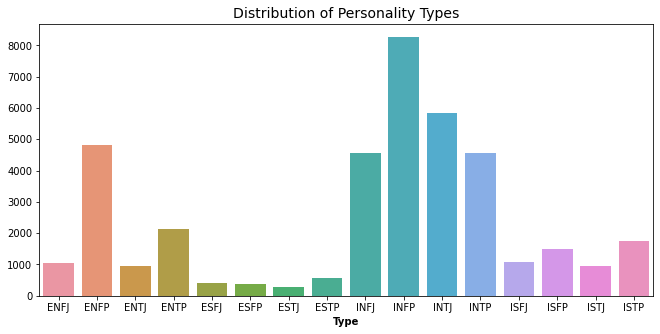

In [0]:
tmp_data_16p_dis = pd.DataFrame(df['type'].value_counts().reset_index().rename({'index': 'type', 'type': 'freq.'}, axis=1)).sort_values(by='type')
cmap = sns.color_palette("Accent", n_colors=16) 
cmap = dict(zip(df['type'].values, cmap))
plt.figure(figsize=(11, 5))
plt.title('Distribution of Personality Types', fontsize=14)
sns.barplot(data=tmp_data_16p_dis, x='type', y='freq.')
plt.ylabel('')
plt.xlabel('Type', fontweight='bold')
plt.show()

<b>Observation(s):<b> <br>
*  Our dataset was suffering from a class imbalance issue which can be a problem when we create the model.
*  Majority of the datapoints belongs to INFP, followed by INTJ.
*  Among Extraverts, ENFP has the most number of datapoints.

In [0]:
type_global_distrib = {'ISFJ': 13.8, 'ESFJ': 12.3, 'ISTJ': 11.6, 'ISFP': 8.8,
                       'ESTJ': 8.7, 'ESFP': 8.5, 'ENFP': 8.1, 'ISTP': 5.4, 
                       'INFP': 4.4, 'ESTP': 4.3, 'INTP': 3.3, 'ENTP': 3.2, 
                       'ENFJ': 2.5, 'INTJ': 2.1, 'ENTJ': 1.8, 'INFJ': 1.5}

# Creating a DataFrame for the Global Data Representation
type_global_distrib_val = list(map(lambda x: x/100, type_global_distrib.values()))
type_global_distrib_col = type_global_distrib.keys()
global_type = pd.DataFrame([type_global_distrib_col, type_global_distrib_val]).T
global_type.columns = ['type', 'freq.']
global_type = global_type.sort_values(by='type')
global_type['freq.'] = global_type['freq.'] * tmp_data_16p_dis['freq.'].sum()

### 3.1.2 Comparing our Dataset Distribution to the Global Data

Since MBTI itself is an active research area, there are lots of available resources of this domain that can be found on the internet. Because of that, we have a downloaded data of the Global Representation of 16 personality types that we can compare to our Dataset. 

> Credits: <a href="https://www.careerplanner.com/MB2/TypeInPopulation.cfm">Career Planner</a>

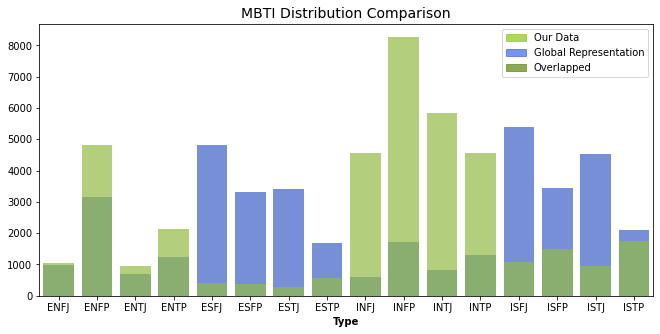

In [0]:
green_patch = mpatches.Patch(color='yellowgreen', label='Our Data', alpha=0.8)
blue_patch = mpatches.Patch(color='royalblue', label='Global Representation', alpha=0.7)
overlap_patch = mpatches.Patch(color='olivedrab', label='Overlapped', alpha=0.77)
 
plt.figure(figsize=(11, 5))
plt.title('MBTI Distribution Comparison', fontsize=14)
sns.barplot(data=global_type, x='type', y='freq.', color='royalblue', alpha=0.8, label='Global Representation')
sns.barplot(data=tmp_data_16p_dis, x='type', y='freq.', color='yellowgreen', alpha=0.7, label='Our Data')
plt.legend(handles=[green_patch, blue_patch, overlap_patch])
plt.xlabel('Type', fontweight='bold')
plt.ylabel('')
plt.show()

<b>Observation(s):<b>
*  The distribution of our data does not follow the distribution of the global data representation. A work around here is to undersample and oversample the dataset to match the global representation, this will avoid misinterpretation of the model's result. In this project, I used both techniques that I will tackle more in the modeling section.
 
*  Lots of Intuitives was over represented in our dataset, especially introverts. I think this is because social media is their main medium for "socializing" and for reflecting their thoughts/opinion.
 
*  In contrast, Sensors was less represented in our dataset. I think this is because of their Sensor nature which makes them busy in other things like physical/outdoor activities.

### 3.1.3 Slicing the Target Column

Let us find out if using other representation of our target column will help us ease the class imbalance problem. ie. 
<br> Slicing the target variable into the 4 personality aspects namely: 


A.) Mind (Introvert or Extravert?)<br>
B.) Energy (Sensing or Intuition?)<br>
C.) Nature (Thinking or Feeling?)<br>
D.) Tactics (Perception or Judging?)<br>


If you haven't read the theory in the link provided at Section 1.1 (Sources/Useful Links), please do so to understand more about the aforementioned terminologies. In any case, let's see what the distribution looks like for these 4 types.

In [0]:
# Create a new column for each personality aspect
df['I-E'] = df['type'].str.contains('I').astype(int)
df['N-S'] = df['type'].str.contains('N').astype(int)
df['T-F'] = df['type'].str.contains('T').astype(int)
df['J-P'] = df['type'].str.contains('J').astype(int)

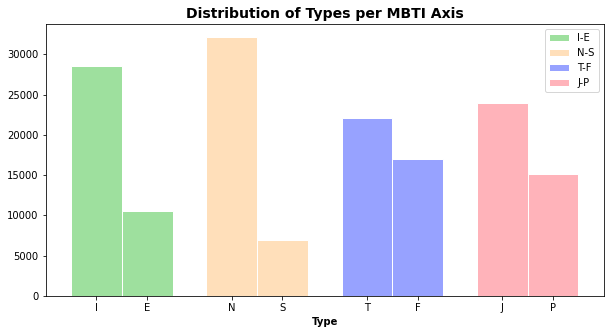

In [0]:
tmp_data1 = pd.DataFrame(df['I-E'].value_counts().reset_index().rename({'I-E': 'freq.'}, axis=1))
tmp_data2 = pd.DataFrame(df['N-S'].value_counts().reset_index().rename({'N-S': 'freq.'}, axis=1))
tmp_data3 = pd.DataFrame(df['T-F'].value_counts().reset_index().rename({'T-F': 'freq.'}, axis=1))
tmp_data4 = pd.DataFrame(df['J-P'].value_counts().reset_index().rename({'J-P': 'freq.'}, axis=1))

bar_width = 0.3
spacer_ls = np.arange(0.1, stop=0.5, step=0.3)
plt.figure(figsize=(10, 5))

plt.title('Distribution of Types per MBTI Axis', fontsize=14, fontweight='bold')
plt.bar(spacer_ls, tmp_data1['freq.'], color='#9ee09e', width=bar_width, edgecolor='white', label='var1')
plt.bar(spacer_ls+0.8, tmp_data2['freq.'], color='#ffdfba', width=bar_width, edgecolor='white', label='var2')
plt.bar(spacer_ls+1.6, tmp_data3['freq.'], color='#97a2ff', width=bar_width, edgecolor='white', label='var3')
plt.bar(spacer_ls+2.4, tmp_data4['freq.'], color='#ffb3ba', width=bar_width, edgecolor='white', label='var4')

plt.xlabel('Type', fontweight='bold')
plt.xticks([spacer_ls[0], spacer_ls[1], (spacer_ls[0]+0.8), (spacer_ls[1]+0.8),
            (spacer_ls[0]+1.6), (spacer_ls[1]+1.6), (spacer_ls[0]+2.4), (spacer_ls[1]+2.4)],
           ['I', 'E', 'N', 'S', 'T', 'F', 'J', 'P'])
 
plt.legend(['I-E', 'N-S', 'T-F',  'J-P'])
plt.show()

<b>Observation(s):<b><br>
*  Although, the distribution for T-F axis and J-P axis is slightly different, the distribution for I-E axis and N-S axis is very different which demands our attention. We will fix this issue later, after the feature extraction stage.
*  This is much better than the previous distribution of types. Before, we need to deal with 16 imbalanced classes, now, we only need to addressed 4 imbalanced binary classes.

### 3.1.4 Check the Correlation between the 4 types

We will check the correlation between the 4 major axes of MBTI before we can use it.
Correlation in our independent variables can be a problem during the modeling phase because it will be difficult for our model to estimate the relationship between our dependent variables and independent variables, <i>independently</i>. 
<br>

ie. As the probability of a person being an Introvert increases, the probability of him being a Thinker decreases. We can say that there is a negative correlation between the two variables. In this case, it will be hard for our model to estimate how introvert a person is, versus how thinker a person is, <i>independently</i>.

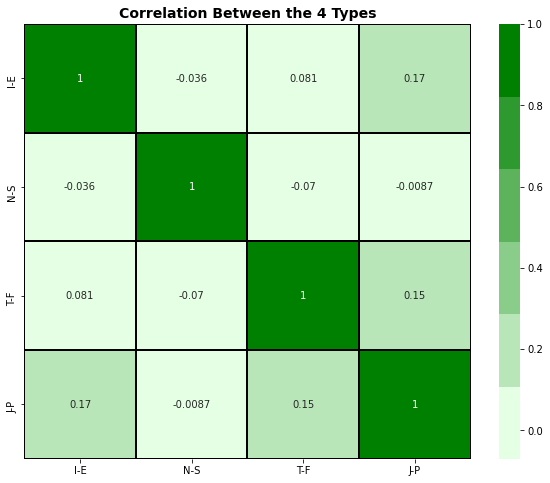

In [0]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Between the 4 Types', fontsize=14, fontweight='bold')
corr = df[['I-E', 'N-S', 'T-F',  'J-P']].corr()
sns.heatmap(data=corr, annot=True, linewidths=1, linecolor='black',
            cmap=sns.light_palette("green"))
plt.show()

<b>Observation(s):<b>
*  The correlation between the 4 types is close to zero, which means there is a very little correlation between those variables, and that is good.

### 3.1.5 Checking the Correlation between the 4 types v2

Just for the sake of my curiosity I will take a glimpse in the distribution of the cognitive functions that are assigned on each type.
<br>
<br>
Cognitive Function is the derivative of the 16 personalities. Each personality type has their unique set of cognitive function, which can be under their: dominant, auxiliary, tertiary, or inferior function. 
<br>

The list below are the possible cognitive functions that a personality type can have:

A.)  Ni- Perspective (of long range outcome or big picture vision)

B.)  Ne-Exploration (of ideas)

C.)  Ti-Accuracy (by pin pointing flaws/deep analysis)

D.)  Te- Effectiveness (by organizing and planning tasks and getting them done)

E.)  Si- Memory (of past sensory data or tradition)

F.)  Se- Sensation (by absorbing immediate reality with 5 senses)

G.)  Fi- Authenticity (based on personal values, ethics and sense of beauty)

H.)  Fe- Harmony (by thinking about what is appropriate to say or do in a social setup which benefits almost everyone)

<br>
<img src="https://qph.fs.quoracdn.net/main-qimg-a411acbb2d409a95db57ef4e081d5408"/>

> Credits: https://www.quora.com/What-is-each-MBTI-cognitive-function-good-for

In [0]:
x = '''INTP = Ti > Ne > Si > Fe
ISTP = Ti > Se > Ni > Fe
ENTP = Ne > Ti > Fe > Si
ENFP = Ne > Fi > Te > Si
ISFP = Fi > Se > Ni > Te
INFP = Fi > Ne > Si > Te
INTJ = Ni > Te > Fi > Se
INFJ = Ni > Fe > Ti > Se
ESTJ = Te > Si > Ne > Fi
ENTJ = Te > Ni > Se > Fi
ESFJ = Fe > Si > Ne > Ti
ENFJ = Fe > Ni > Se > Ti
ISTJ = Si > Te > Fi > Ne
ISFJ = Si > Fe > Ti > Ne
ESTP = Se > Ti > Fe > Ni
ESFP = Se > Fi > Te > Ni'''

type_json = {}
function_order = ['dominant', 'auxiliary', 'tertiary', 'inferior']
function_one_hot = {'ti': 1, 'ni': 1, 'si': 1, 'fi': 1,
                    'te': 0, 'ne': 0, 'se': 0, 'fe': 0}
for types in x.split('\n'):
  p_type = types.split('=')[0].strip()
  functions = tuple(map(str.strip, types.split('=')[1].lower().split('>')))
  type_json[p_type] = dict(zip(function_order, functions))

def get_functions(t):
  f_dict = type_json[t]
  one_hot_vector = []
  for i in function_order:
    one_hot_mapper = f_dict[i]
    one_hot_vector.append(function_one_hot[one_hot_mapper])
  return pd.Series(list(f_dict.values()))

df[['dominant', 'auxiliary', 'tertiary', 'inferior']] = df['type'].apply(get_functions)

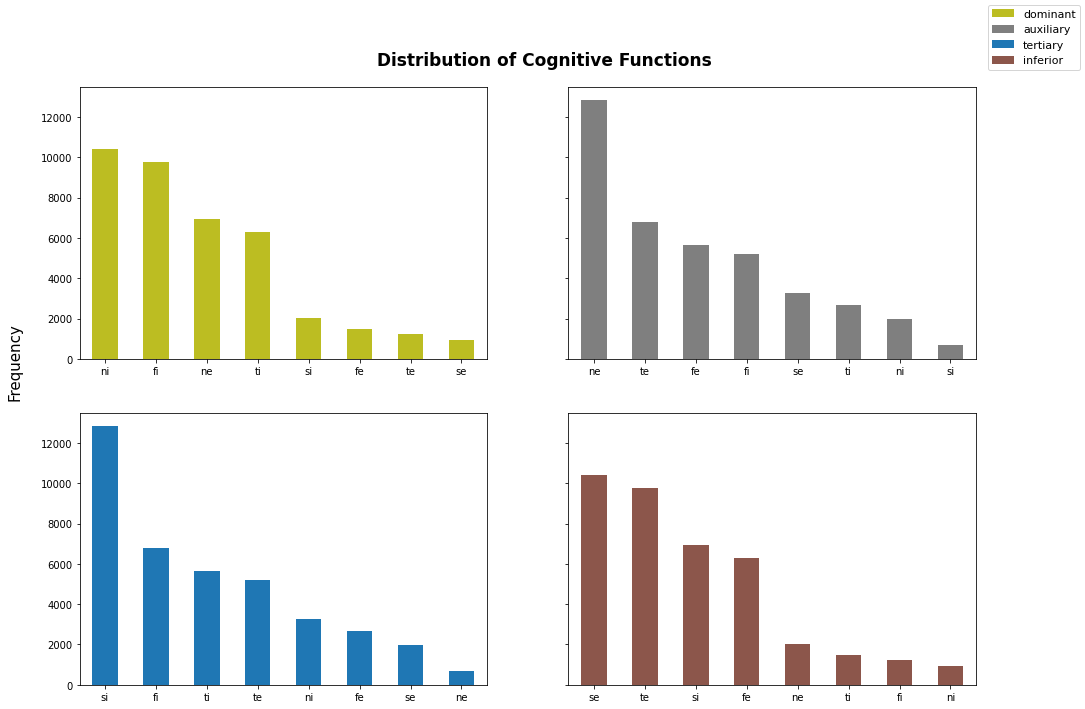

In [0]:
plt.close('all')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), sharey=True)
fig.suptitle('Distribution of Cognitive Functions', 
             fontsize=17, y=0.93, fontweight='bold')

df['dominant'].value_counts().plot(kind='bar', ax=ax[0][0], color='tab:olive')
df['auxiliary'].value_counts().plot(kind='bar', ax=ax[0][1], color='tab:gray')
df['tertiary'].value_counts().plot(kind='bar', ax=ax[1][0], color='tab:blue')
df['inferior'].value_counts().plot(kind='bar', ax=ax[1][1], color='tab:brown')

ax[0][0].xaxis.set_tick_params(rotation=0)
ax[0][1].xaxis.set_tick_params(rotation=0)
ax[1][0].xaxis.set_tick_params(rotation=0)
ax[1][1].xaxis.set_tick_params(rotation=0)

fig.text(0.01, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=15)

handles = []
labels = []
for a in ax:
  for i in a:
    h, l = i.get_legend_handles_labels()
    handles.append(h[0])
    labels.append(l[0])

fig.legend(handles, labels, loc='upper right', fontsize=11)
plt.subplots_adjust(left=0.07, bottom=0.05)
fig.show()

In [0]:
print('Dominant Ni:', df[df['dominant'] == 'ni'].type.unique())
print('Auxiliary Ne:', df[df['auxiliary'] == 'ne'].type.unique())
print('Tertiary Si:', df[df['tertiary'] == 'si'].type.unique())
print('Inferior Se:', df[df['inferior'] == 'se'].type.unique())

Dominant Ni: ['INTJ' 'INFJ']
Auxiliary Ne: ['INFP' 'INTP']
Tertiary Si: ['INFP' 'INTP']
Inferior Se: ['INTJ' 'INFJ']


In [0]:
df = df.drop(columns='dominant	auxiliary	tertiary	inferior'.split(), axis=1)

As exprected, class imbalance is still present at this level of granularity. I will leave this for now and stick with the 4 personality aspects.

## 3.2 Partial Text Preprocessing 
 
Before I proceed on the Analysis part, I will perform basic data cleanup first on our text data. Basically, I will remove/replace some string that I do not need for my analysis. Particularly, I removed the html tags like: ```["<div>", "<h1>", "<p>", etc]```
. I also decontracted each word in the corpus ie. from: thnx, to thanks.  Lastly, I remove extra white space for each document, ie. characters such as \n \t \r. This partial text preprocessing is for the purpose of feature engineering phase, so that I can craft/parse the needed word/phrase from the text.I will do further data preprocessingafter analyzing the designed features.

In [0]:
def rep(text):
    grp = text.group(0)
    if len(grp) > 1:
        return grp[0:1] # can change the value here on repetition

def unique_char(rep, sentence):
    convert = re.sub(r'(\w)\1+', rep, sentence) 
    return convert
    
def get_unique_char(string):
  return unique_char(rep, string)

def remove_alias(string):
    return re.sub('\*', ' ', string).strip()

def remove_html_tags(string):
    return re.sub('<.+?>', ' ', string).strip()

def decontract_string(string):
    # https://stackoverflow.com/a/47091490/4084039
    phrase = re.sub(r"won't", "will not", string)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"thx", " thanks", phrase)
    phrase = re.sub(r"thnx", " thanks", phrase)
    return phrase.strip()
  
def remove_multi_whitespace(string):
  return re.sub(r'\s+', ' ', string).strip()

def replace_emoji(samp):
    samp = samp.lower()
    samp = samp.replace(r':)', '[smile-emoji]')
    samp = samp.replace(r'◠‿◠✿', '[smile-emoji]')
    samp = samp.replace(r':p', '[tongue-out-emoji]')
    samp = samp.replace(r':d', '[big-smile-emoji]')
    samp = samp.replace(r':(', '[sad-emoji]')
    samp = samp.replace(r'^_^', '[smile-emoji]')
    return samp.strip()

def replace_url(string):
  return re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '[url]', string)

def remove_special_char(string):
  return re.sub('[^a-zA-Z0-9\n]', ' ', string)

def remove_stopwords(string):
  return ' '.join([i for i in string.split() if i.lower() not in stopwords])

def replace_quot(string):
  return string.replace('&quot;', ' ')

def preprocess_before_feature_engineering(string):
  string = remove_html_tags(string)
  string = decontract_string(string)
  string = remove_multi_whitespace(string)
  return string

def preprocess_after_feature_engineering(string):
  string = string.lower()
  string = replace_emoji(string)
  string = replace_url(string)
  string = remove_alias(string)
  string = replace_quot(string)
  string = remove_special_char(string)
  string = remove_stopwords(string)
  return string

In [0]:
from tqdm import tqdm
tqdm.pandas()
df['comment'] = df['comment'].progress_apply(preprocess_before_feature_engineering)
df = df[df['comment'].str.len() > 1]

<b>DataFrame after partial preprocessing</b>

In [0]:
df.head()

,type,comment,I-E,N-S,T-F,J-P
0,ESFP,The secretive guy wrote: There's a thread just...,0,0,0,0
1,INFP,I wanna write a little story; because reading ...,1,1,0,0
2,INTP,"caly, goddess of love wrote: my friend is gonn...",1,1,1,0
3,INFP,"I would focus on myself, and continue to be fr...",1,1,0,0
4,INTJ,"There are an equal number of pros and cons, to...",1,1,1,1


In [0]:
print('PREPROCESSED TEXT #1:', df['comment'].sample(1).iloc[0])
print()
print('PREPROCESSED TEXT #2:', df['comment'].sample(1).iloc[0])
print()
print('PREPROCESSED TEXT #3:', df['comment'].sample(1).iloc[0])

PREPROCESSED TEXT #1: I feel exactly the same way. It's definitely an inconvenient preference to have at times, but I think it's worth it. Being part of a relaxed, hilarious and generally judgement-free group of friends has been an experience that I wouldn't take back (even if it gets a little complex sometimes). It's super great to know that there's someone else out there in a similar situation. I haven't let gender or the opinions of outsiders get in the way of making good friends as of yet, and I hope you manage to do the same :)

PREPROCESSED TEXT #2: So I married really young to an ESFJ. At 21 to my one and only real boyfriend ever. I recently found out that I am in a relationship of benefit according to socionics and it fits my marriage description well. I am the beneficiary and I don't like it because I feel like my husband doesn't really understand me for who I am inside. He doesn't like the same things I like to talk about and it feels like he undervalues me. Although he tells

As you can see, there are remaining special characters like dots, parenthesis, quotes, etc. This is okay for now, we will deal with those characters later.

## 3.3 Feature Analysis and Design

### 3.3.1 Feature Design (Meta Features)

In this section I will derive some meta features from the text data. I believe that this is one of the fun part of the data science process as this will test your creativity. Also, a well derived features is one of the secret recipe in developing a good model. 
 
<br>
I listed below the meta features that I will craft from the text data:
<br>
<br>
<h4> Base Features:</h4>
These Base Features will be the basis for some of the Meta Features.
I decided to create this feature set based on my prior observation in the dataset, as well as in the discussion forum. ie. There are users that uses quoted words frequently than others. Or, there are types of user that has a longer post than usual.<br><br>
 
 
<b>count_all_upper</b> - Number of words which is composed of all uppercase letters, ie. HELLOWORLD. <br>
 
<b>count_with_upper</b> - Number of words that has atleast 1 uppercase letter, ie. DataScience. <br>
 
<b>count_punct</b> - Number of punctuations, ie. [ ,.?!$%^~ ] <br>
 
<b>count_emoji</b> - Number of emojis, ie. :smile-emoji: <br>
 
<b>count_word_aliasing</b> - Number of words surrounded by asterisk, ie. \*Cries in ENTP*. <br>
 
<b>count_word_quoting</b> - Number of words surrounded by double quotes, ie. \"If you cannot explain it to a 6 years old, then you do not understand it yourself." <br>
 
<b>count_post</b> - Total Number of posts by the user <br>
 
<b>count_word</b> - Total Number of words used by the user <br>
 
<b>count_character</b> - Total Number of characters used by the user.<br>
<br>
<h4>Feature set #1 (Average Features):</h4>
Basically the average values of the base features wrt the number of posts of the user. <br>
ie. <b>words_per_post</b> = count_word / count_post <br> 
<b>emojis_per_post</b> = count_emoji / count_post
<br><br>
 
<h4>Feature set #2 (Part of Speech Features):</h4> 
In this feature set, I used the Part of Speech (POS) tagging tool by NLTK to extract the associated POS tag for a particular word.
With that, I was able to extract the mean frequency of each POS tag per User. I extracted this features because I think that each personality type will use a unique set of tags in their vocabulary. But there is problem with POS tagging, extracting this features in a large corpus can be time consuming, later I will perform feature selection to see if some of these features are worth keeping.<br>
 
I listed below the POS tags used by NLTK for your reference:
 
<table cellpadding="2" cellspacing="2" border="0">
  <tbody><tr bgcolor="#DFDFFF" align="none"> 
    <td align="none"> 
      <div align="left"><h5>Number</h5></div>
    </td>
    <td> 
      <div align="left"><h5>Tag</h5></div>
    </td>
    <td> 
      <div align="left"><h5>Description</h5></div>
    </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 1. </td>
    <td>CC </td>
    <td>Coordinating conjunction </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 2. </td>
    <td>CD </td>
    <td>Cardinal number </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 3. </td>
    <td>DT </td>
    <td>Determiner </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 4. </td>
    <td>EX </td>
    <td>Existential <i>there<i> </i></i></td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 5. </td>
    <td>FW </td>
    <td>Foreign word </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 6. </td>
    <td>IN </td>
    <td>Preposition or subordinating conjunction </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 7. </td>
    <td>JJ </td>
    <td>Adjective </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 8. </td>
    <td>JJR </td>
    <td>Adjective, comparative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 9. </td>
    <td>JJS </td>
    <td>Adjective, superlative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 10. </td>
    <td>LS </td>
    <td>List item marker </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 11. </td>
    <td>MD </td>
    <td>Modal </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 12. </td>
    <td>NN </td>
    <td>Noun, singular or mass </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 13. </td>
    <td>NNS </td>
    <td>Noun, plural </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 14. </td>
    <td>NNP </td>
    <td>Proper noun, singular </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 15. </td>
    <td>NNPS </td>
    <td>Proper noun, plural </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 16. </td>
    <td>PDT </td>
    <td>Predeterminer </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 17. </td>
    <td>POS </td>
    <td>Possessive ending </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 18. </td>
    <td>PRP </td>
    <td>Personal pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 19. </td>
    <td>PRP\$ </td>
    <td>Possessive pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 20. </td>
    <td>RB </td>
    <td>Adverb </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 21. </td>
    <td>RBR </td>
    <td>Adverb, comparative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 22. </td>
    <td>RBS </td>
    <td>Adverb, superlative </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 23. </td>
    <td>RP </td>
    <td>Particle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 24. </td>
    <td>SYM </td>
    <td>Symbol </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 25. </td>
    <td>TO </td>
    <td><i>to</i> </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 26. </td>
    <td>UH </td>
    <td>Interjection </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 27. </td>
    <td>VB </td>
    <td>Verb, base form </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 28. </td>
    <td>VBD </td>
    <td>Verb, past tense </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 29. </td>
    <td>VBG </td>
    <td>Verb, gerund or present participle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 30. </td>
    <td>VBN </td>
    <td>Verb, past participle </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 31. </td>
    <td>VBP </td>
    <td>Verb, non-3rd person singular present </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 32. </td>
    <td>VBZ </td>
    <td>Verb, 3rd person singular present </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 33. </td>
    <td>WDT </td>
    <td>Wh-determiner </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 34. </td>
    <td>WP </td>
    <td>Wh-pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 35. </td>
    <td>WP$ </td>
    <td>Possessive wh-pronoun </td>
  </tr>
  <tr bgcolor="#FFFFCA"> 
    <td align="none"> 36. </td>
    <td>WRB </td>
    <td>Wh-adverb </td>
  </tr>
  </tbody></table>
<br>
 
  > Source: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

In [0]:
def count_all_upper(string):
  total_ls = []
  for word in string.split():
    total_ls.append(int(bool(re.match(r'[A-Z]+$', word))))
  return sum(total_ls)

def count_with_upper(text):
    line = re.findall(r'\b[A-Z]\w+', text)
    return len(line)

def count_punct(text):
    line = re.findall(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*', text)
    string="".join(line)
    return len((string))

def count_emoji(string):
  return len([i for i in string.split() if i in emojis.keys()])

def count_word_aliasing(string):
  return len(re.findall('\*(.+?)\*', string))

def count_word_quoting(string):
  string = string.replace('&quot;', '"')
  quotes = len(re.findall('\"(.+?)\"', string))
  return quotes

def count_post(string):
  return len(string.split('|||'))

def count_word(string):
  return len(string.replace('|||', ' ').split())

def count_character(string):
  return len(string.replace('|||', ' '))

def count_numbers(string):
    line = re.findall(r'[0-9]+', string)
    return len(line)

In [0]:
# Base features
df['post_count'] = df['comment'].apply(count_post)
df['word_count'] = df['comment'].apply(count_word)
df['character_count'] = df['comment'].apply(count_character)
df['title_case_count'] = df['comment'].apply(count_with_upper)
df['caps_count'] = df['comment'].apply(count_all_upper)
df['punct_count'] = df['comment'].apply(count_punct)
df['emoji_count'] = df['comment'].apply(count_emoji)
df['alias_count'] = df['comment'].apply(count_word_aliasing)
df['quoted_words_count'] = df['comment'].apply(count_word_quoting)
df['digit_count'] = df['comment'].apply(count_numbers)

# Feature set #2
df['words_per_post'] = df['word_count'] / df['post_count']
df['characters_per_post'] = df['character_count'] / df['post_count']
df['title_case_per_post'] = df['title_case_count'] / df['post_count']
df['caps_per_post'] = df['caps_count'] / df['post_count']
df['puncts_per_post'] = df['punct_count'] / df['post_count']
df['emoji_per_post'] = df['emoji_count'] / df['post_count']
df['alias_per_post'] = df['alias_count'] / df['post_count']
df['quoted_words_per_post'] = df['quoted_words_count'] / df['post_count']
df['digit_count_per_post'] = df['digit_count'] / df['post_count']

# Feature set #3
pass

<b> Our Data after adding features </b>

In [0]:
df.head()

,type,comment,I-E,N-S,T-F,J-P,post_count,word_count,character_count,title_case_count,caps_count,punct_count,emoji_count,alias_count,quoted_words_count,digit_count,words_per_post,characters_per_post,title_case_per_post,caps_per_post,puncts_per_post,emoji_per_post,alias_per_post,quoted_words_per_post,digit_count_per_post
0,ESFP,The secretive guy wrote: There's a thread just...,0,0,0,0,1,21,122,6,0,5,0,0,0,0,21.000000,122.000000,6.000000,0.000000,5.000000,0.0,0.0,0.000000,0.000000
1,INFP,I wanna write a little story; because reading ...,1,1,0,0,2,475,2625,49,9,92,0,0,2,1,237.500000,1312.500000,24.500000,4.500000,46.000000,0.0,0.0,1.000000,0.500000
2,INTP,"caly, goddess of love wrote: my friend is gonn...",1,1,1,0,1,18,100,4,0,8,0,0,0,0,18.000000,100.000000,4.000000,0.000000,8.000000,0.0,0.0,0.000000,0.000000
3,INFP,"I would focus on myself, and continue to be fr...",1,1,0,0,22,1678,9030,93,48,256,0,0,2,35,76.272727,410.454545,4.227273,2.181818,11.636364,0.0,0.0,0.090909,1.590909
4,INTJ,"There are an equal number of pros and cons, to...",1,1,1,1,5,409,2507,43,5,79,0,0,0,1,81.800000,501.400000,8.600000,1.000000,15.800000,0.0,0.0,0.000000,0.200000


<b> High level Statistics of the Meta Features </b>

In [0]:
df.drop('I-E N-S T-F J-P'.split(), axis=1).describe()

,post_count,word_count,character_count,title_case_count,caps_count,punct_count,emoji_count,alias_count,quoted_words_count,words_per_post,characters_per_post,title_case_per_post,caps_per_post,puncts_per_post,emoji_per_post,alias_per_post,quoted_words_per_post
count,39040.000000,3.904000e+04,3.904000e+04,39040.000000,39040.00000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000,39040.000000
mean,41.991983,4.110013e+03,2.211100e+04,454.710476,159.28750,1026.266803,0.000564,5.652818,36.393212,97.458727,510.177459,7.407179,4.666847,17.080150,0.000053,0.038125,0.348501
std,341.936052,3.950901e+04,2.193216e+05,5871.930476,1271.80568,12366.376283,0.026775,87.678182,675.971250,118.179593,619.345112,8.980005,6.421117,19.018762,0.004510,0.340885,0.905734
min,1.000000,1.000000e+00,2.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,6.100000e+01,3.180000e+02,5.000000,2.00000,11.000000,0.000000,0.000000,0.000000,32.500000,169.494565,2.600000,1.000000,6.767371,0.000000,0.000000,0.000000
50%,3.000000,2.460000e+02,1.286500e+03,18.000000,11.00000,46.000000,0.000000,0.000000,0.000000,66.302174,346.808854,5.000000,3.000000,12.750000,0.000000,0.000000,0.000000
75%,11.000000,1.076000e+03,5.608250e+03,81.000000,50.00000,204.000000,0.000000,0.000000,3.000000,121.000000,633.187626,9.000000,6.000000,21.250000,0.000000,0.000000,0.391304
max,19096.000000,2.718403e+06,1.517363e+07,417010.000000,94243.00000,933406.000000,2.000000,5216.000000,48750.000000,3075.000000,15982.000000,233.000000,152.000000,610.000000,0.500000,39.500000,71.500000


<b> Saving the DataFrame with the New Generated Features </b>

In [0]:
df.to_csv(OUTPUT_DIR + 'df_with_meta_features.csv', index=False)

### 3.3.2 Univariate Analysis

In [0]:
sns.reset_orig()

In [0]:
def plot_distribution(title, xlabel, ylabel, feature, kind='dist', log=False):
  tmp_df = df.copy()
  fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), sharey=True)
  fig.suptitle(title, fontsize=15, y=0.93)
  
  if log:
    tmp_df[feature] = np.log10(tmp_df[feature])

  if kind == 'dist':
    # I-E
    sns.distplot(tmp_df.loc[tmp_df['I-E']==1, feature], ax=ax[0][0], label='Introvert')
    sns.distplot(tmp_df.loc[tmp_df['I-E']==0, feature], ax=ax[0][0], label='Extravert' )
    ax[0][0].legend(loc="upper right")

    # N-S
    sns.distplot(tmp_df.loc[tmp_df['N-S']==1, feature], ax=ax[0][1], label='Intuitive')
    sns.distplot(tmp_df.loc[tmp_df['N-S']==0, feature], ax=ax[0][1], label='Sensor' )
    ax[0][1].legend(loc="upper right")

    # T-F
    sns.distplot(tmp_df.loc[tmp_df['T-F']==1, feature], ax=ax[1][0], label='Thinker')
    sns.distplot(tmp_df.loc[tmp_df['T-F']==0, feature], ax=ax[1][0], label='Feeler' )
    ax[1][0].legend(loc="upper right")

    # J-P
    sns.distplot(tmp_df.loc[tmp_df['J-P']==1, feature], ax=ax[1][1], label='Judging')
    sns.distplot(tmp_df.loc[tmp_df['J-P']==0, feature], ax=ax[1][1], label='Perceiving' )
    ax[1][1].legend(loc="upper right")

  elif kind == 'violin':
    # I-E
    sns.violinplot(tmp_df.loc[tmp_df['I-E']==1, feature], ax=ax[0][0], label='Introvert')
    sns.violinplot(tmp_df.loc[tmp_df['I-E']==0, feature], ax=ax[0][0], label='Extravert' )
    ax[0][0].legend(loc="upper right")

    # N-S
    sns.violinplot(tmp_df.loc[tmp_df['N-S']==1, feature], ax=ax[0][1], label='Intuitive')
    sns.violinplot(tmp_df.loc[tmp_df['N-S']==0, feature], ax=ax[0][1], label='Sensor' )
    ax[0][1].legend(loc="upper right")

    # T-F
    sns.violinplot(tmp_df.loc[tmp_df['T-F']==1, feature], ax=ax[1][0], label='Thinker')
    sns.violinplot(tmp_df.loc[tmp_df['T-F']==0, feature], ax=ax[1][0], label='Feeler' )
    ax[1][0].legend(loc="upper right")

    # J-P
    sns.violinplot(tmp_df.loc[tmp_df['J-P']==1, feature], ax=ax[1][1], label='Judging')
    sns.violinplot(tmp_df.loc[tmp_df['J-P']==0, feature], ax=ax[1][1], label='Perceiving' )
    ax[1][1].legend(loc="upper right")

  else:
    print('Invalid Argument for "kind", use dist or violin to continue.')

  for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
      ax[i][j].set_xlabel('')

  fig.text(0.47, 0.01, xlabel, ha='center', va='center', fontsize=12)
  fig.text(0.01, 0.5, ylabel, ha='center', va='center', rotation='vertical', fontsize=12)
  plt.subplots_adjust(left=0.05, bottom=0.05)
  
  tmp_df = None
  del tmp_df
  
  plt.show()

<b> Total Post per user <b>

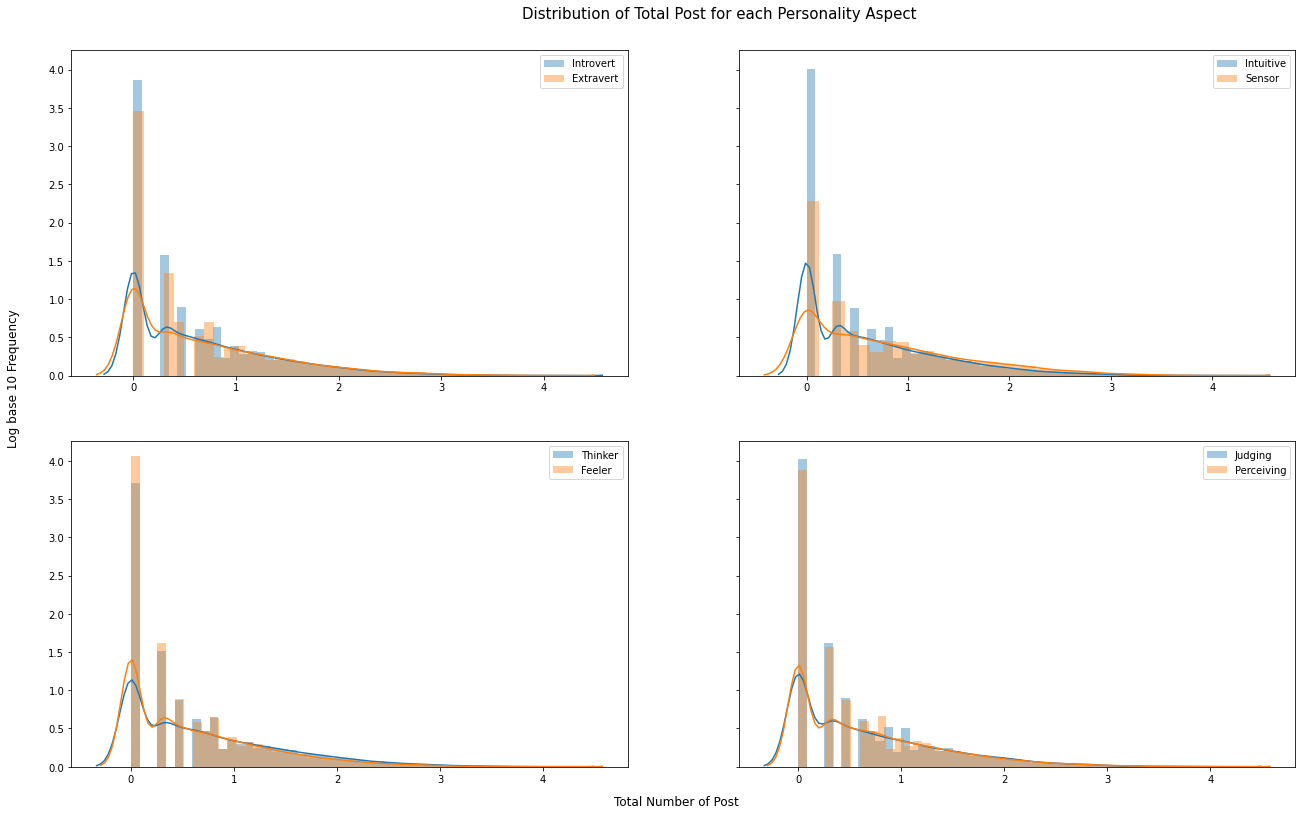

In [0]:
plot_distribution(title='Distribution of Total Post for each Personality Aspect',
                  xlabel='Total Number of Post',
                  ylabel='Log base 10 Frequency',
                  feature='post_count',
                  log=True)

<b> Observation(s): </b><br>
*  As expected, this looks like a pareto distribution, where 80% of the output came from the 20% of the input and vice versa. 
*  This distribution shows some outliers which we will normalize later.
*  Many intuitives posted a comment only once compared to their opposing type.

<b> Number of Words per User <b>

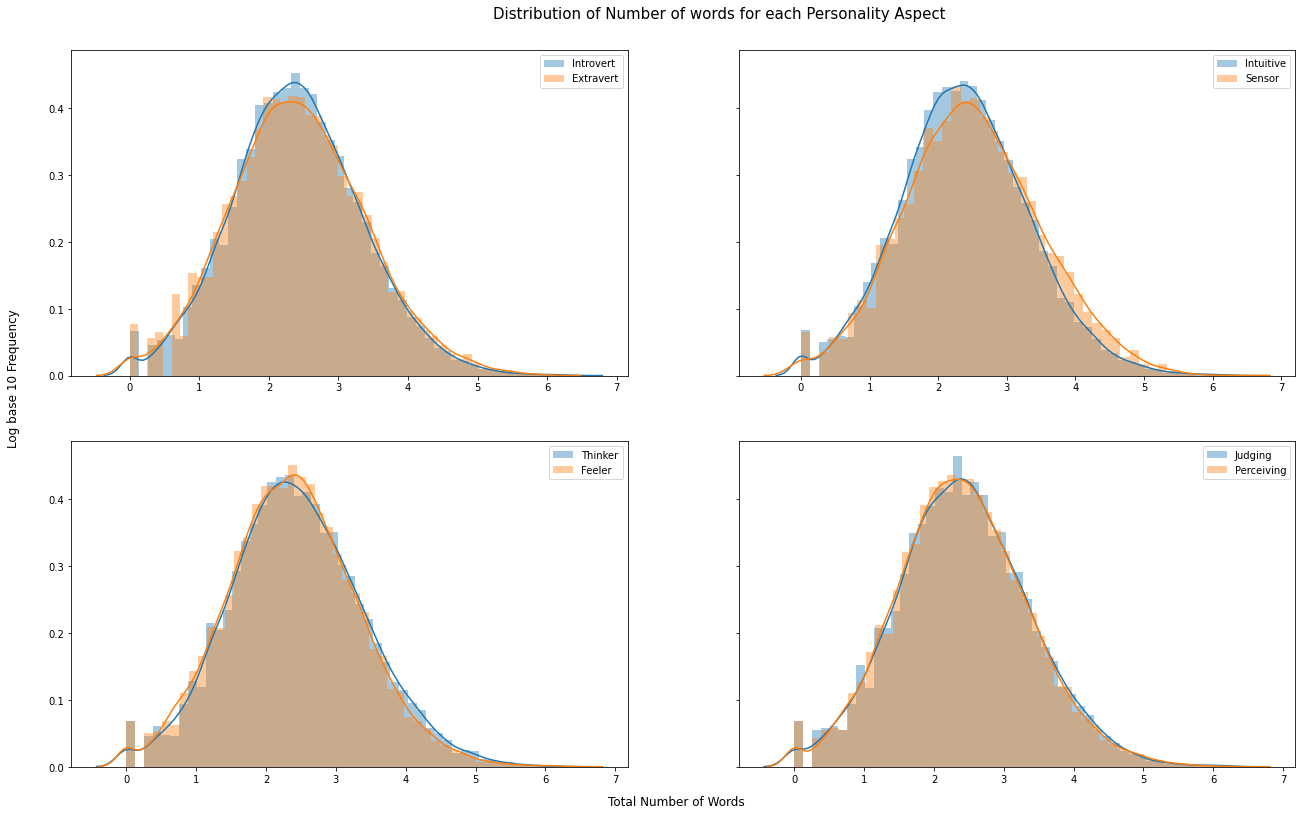

In [0]:
plot_distribution(title='Distribution of Number of words for each Personality Aspect',
                  xlabel='Total Number of Words',
                  ylabel='Log base 10 Frequency',
                  feature='word_count',
                  log=True)

<b> Observation(s): </b><br>
*  There is a little separation between the distribution of intuitives and sensors. This implies that, some of the sensors uses more words than the intuitives.

<b>Number of Capitalized Words per Post<b>

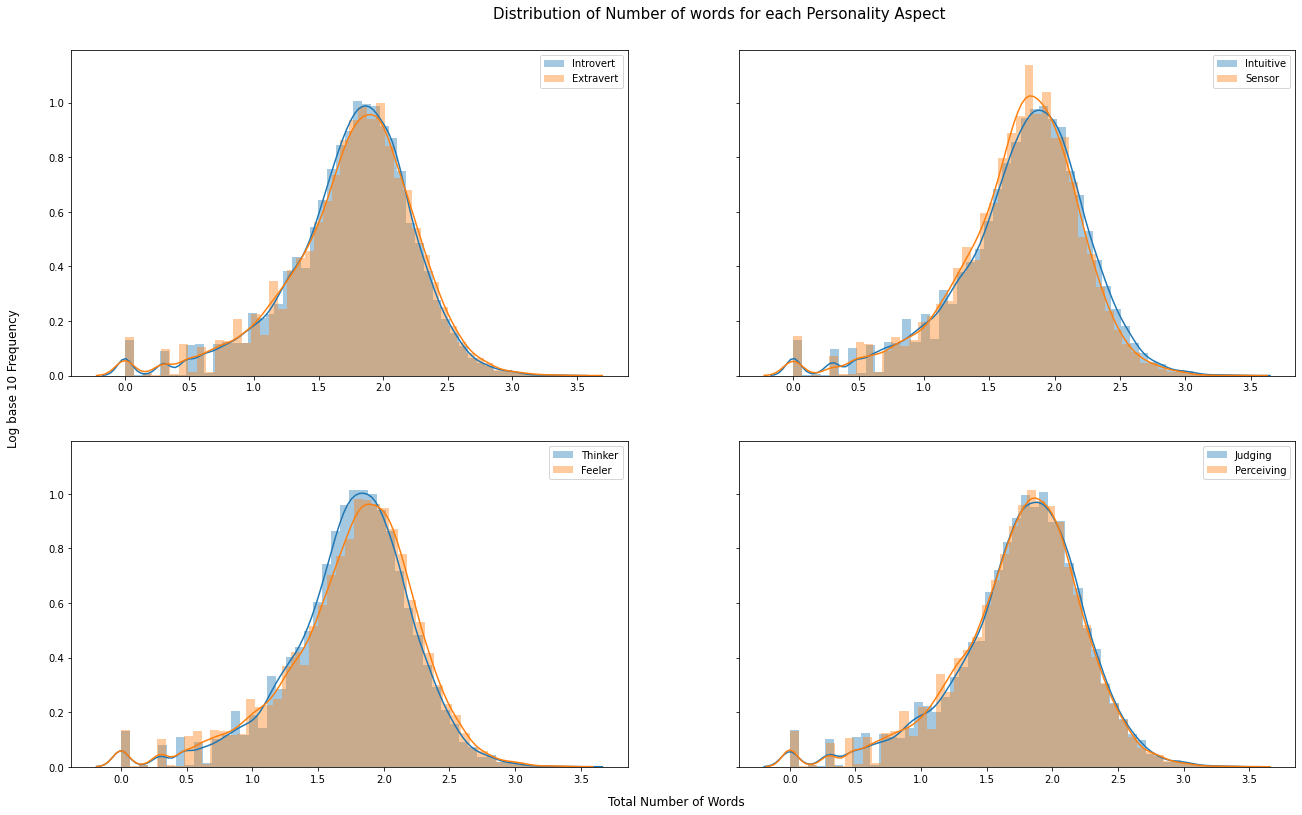

In [0]:
plot_distribution(title='Distribution of Number of words for each Personality Aspect',
                  xlabel='Total Number of Words',
                  ylabel='Log base 10 Frequency',
                  feature='words_per_post',
                  log=True)

<b> Observation(s): </b><br>
*  On average, sensors uses more capitalized words than intuitives.
*  There is some fluctuation of values for thinkers vs feelers which creates a little separation between them.

## 3.4 Full Text Preprocessing

As I've said earlier, I will return to the data preprocessing phase after the feature analysis part. Here I will perform the complete text preprocessing. Also, I will perform the POS tagging here, as mentioned earlier.

In [0]:
lemma = nltk.wordnet.WordNetLemmatizer()
ps = PorterStemmer()

def get_pos(string):
  ls = word_tokenize(string)
  return pd.Series(list(dict(nltk.pos_tag(ls)).values())).value_counts()

def get_lemma(string):
  ls = word_tokenize(string)
  ls = list(map(lambda x: lemma.lemmatize(x), ls))
  return ' '.join(ls)

In [0]:
df = pd.read_csv(OUTPUT_DIR + 'df_with_meta_features.csv')

<b>Full Text Preprocessing</b>

In [0]:
if not os.path.isfile(OUTPUT_DIR + 'df_with_meta_features_lemma.csv'):
  tqdm.pandas()
  df['comment'] = df['comment'].progress_apply(preprocess_after_feature_engineering)
  df = df[df['comment'].str.len() > 1]

<b>Lemmatization</b>

In [0]:
if not os.path.isfile(OUTPUT_DIR + 'df_with_meta_features_lemma.csv'):
  tqdm.pandas()
  df['comment'] = df['comment'].progress_apply(get_lemma)
  df.to_csv(OUTPUT_DIR + 'df_with_meta_features_lemma.csv', index=False)

<b>POS Features</b>

In [0]:
if not os.path.isfile(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv'):
  tqdm.pandas()
  pos_features = df['comment'].progress_apply(get_pos)
  pos_features = pos_features.fillna(0)
  pos_features = pos_features.drop(['type', 'comment'], axis=1)
  new_df = pd.concat([df, pos_features], axis=1) 
  
else:
  new_df = pd.read_csv(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv', usecols=['comment', 'type', 'I-E', 'N-S', 'T-F', 'J-P'])

In [0]:
print(new_df.shape)

<b> Save a copy of the DataFrame for later use </b>

In [0]:
if not os.path.isfile(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv'):
  new_df.to_csv(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv', index=False)

## 3.5 Feature Extraction and Analysis (TFIDF)

### 3.5.1 Train and Test Set Splitting

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_df['comment'], 
                                                    new_df[['type', 'I-E', 'N-S', 'T-F', 'J-P']], 
                                                    test_size=0.3, random_state=100,
                                                    stratify=new_df['type'])
 
# Introvert & Extravert
X_train_I, X_test_I, y_train_I, y_test_I = train_test_split(new_df.loc[new_df['I-E']==1, 'comment'], new_df.loc[new_df['I-E']==1, 'I-E'], test_size=0.3, random_state=100)
X_train_E, X_test_E, y_train_E, y_test_E = train_test_split(new_df.loc[new_df['I-E']==0, 'comment'], new_df.loc[new_df['I-E']==0, 'I-E'], test_size=0.3, random_state=100)
 
# Thinker & Feeler
X_train_T, X_test_T, y_train_T, y_test_T = train_test_split(new_df.loc[new_df['T-F']==1, 'comment'], new_df.loc[new_df['T-F']==1, 'T-F'], test_size=0.3, random_state=100)
X_train_F, X_test_F, y_train_F, y_test_F = train_test_split(new_df.loc[new_df['T-F']==0, 'comment'], new_df.loc[new_df['T-F']==0, 'T-F'], test_size=0.3, random_state=100)
 
# Intuitive & Sensor
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(new_df.loc[new_df['N-S']==1, 'comment'], new_df.loc[new_df['N-S']==1, 'N-S'], test_size=0.3, random_state=100)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(new_df.loc[new_df['N-S']==0, 'comment'], new_df.loc[new_df['N-S']==0, 'N-S'], test_size=0.3, random_state=100)
 
# Judging & Perceiving
X_train_J, X_test_J, y_train_J, y_test_J = train_test_split(new_df.loc[new_df['J-P']==1, 'comment'], new_df.loc[new_df['J-P']==1, 'J-P'], test_size=0.3, random_state=100)
X_train_P, X_test_P, y_train_P, y_test_P = train_test_split(new_df.loc[new_df['J-P']==0, 'comment'], new_df.loc[new_df['J-P']==0, 'J-P'], test_size=0.3, random_state=100)

In [0]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (27283,)
X_test Shape: (11693,)
y_train Shape: (27283, 4)
y_test Shape: (11693, 4)


### 3.5.2 Bag of Words (BoW)

One of the aspect that we need to look into when deciding what TFIDF parameters to use, is the BoW representation. This will give us an intuition on how we are going to tweak the parameters for TFIDF.

On this part, I will use min_df=10; and max_df=0.5 as my parameters, this will filter each word in the document by how common/rare they are in the whole corpus.

In this section, I will answer the following questions by performing data analysis on the Bag of Words representation:

1.) How are word frequencies distributed in the whole dataset?

2.) How many unique words are present in the dataset?

3.) What are the top words used? In general and Personality type wise.

4.) Is the text feature stable across train, test and CV datasets?

In [0]:
def vectorize_words(data, max_df, ngrams=(1,1)):
  text_vectorizer = CountVectorizer(min_df=1, max_df=max_df, ngram_range=ngrams,
                                    decode_error='replace', stop_words=stopwords)
  train_text_feature_onehotCoding = text_vectorizer.fit_transform(data)
  train_text_features= text_vectorizer.get_feature_names()
  train_text_feature_counts = train_text_feature_onehotCoding.sum(axis=0).A1
  text_fea_dict = dict(zip(list(train_text_features), train_text_feature_counts))
  return train_text_feature_onehotCoding

In [0]:
def plot_topn_words(d1, d2, title, colors, n):
  fig, axes = plt.subplots(1, 2, figsize=(15,10))

  sns.barplot(y=d1['y'][:n], x=d1['x'][:n], color=colors['bar'], ax=axes[0])\
     .set_title(title['d1'], color=colors['title'])
  axes[0].set(ylabel=" ", xlabel=" ")

  sns.barplot(y=d2['y'][:n], x=d2['x'][:n], color=colors['bar'], ax=axes[1])\
     .set_title(title['d2'], color=colors['title'])
  axes[1].set(ylabel=" ", xlabel=" ")

  fig.suptitle(title['suptitle'].format(n), fontsize=16, color="blue")
  fig.show() 

In [0]:
text_feature_dict = vectorize_words(X_train, max_df=1)
sorted_text_feature_dict = dict(sorted(text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
sorted_text_occur = np.array(list(sorted_text_feature_dict.values()))

#### 3.5.2.1 How are the word Frequencies Distributed in the Whole Training Set?

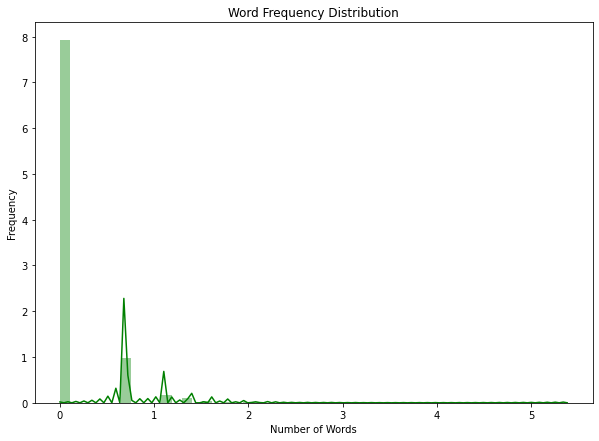

In [31]:
plt.figure(figsize=(10,7))
plt.title('Word Frequency Distribution')
sns.distplot(np.log(sorted_text_occur), color='green')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

<b> Observation(s): </b><br>
*  As expected, there are more words that were used much often on each document.

#### 3.5.2.2 How many Unique Words are Present in the Training Set?

In [0]:
print("Total number of unique words in train data :", len(sorted_text_feature_dict))

Total number of unique words in train data : 42725


#### 3.5.2.3 What are the top words used in General?

In [0]:
temp = pd.DataFrame(pd.Series(index=list(text_feature_dict.keys()), data=list(text_feature_dict.values())).sort_values(ascending=False).head(15)).reset_index()
temp.columns = ['word', 'freq']

In [0]:
temp.style.background_gradient(cmap='Reds')

,word,freq
0,yasahiro,849
1,g360v,176
2,racek,153
3,g960u,111
4,hirixo,109
5,rattlin,108
6,n900v,106
7,ataktos,100
8,cccccccc,96
9,envirio,90


In [0]:
fig = px.bar(temp, x="freq", y="word", title='Commmon Words in The Training Set', orientation='h', 
             width=600, height=600, color='word')
fig.show()

In [0]:
fig = px.treemap(temp, values='freq', title='Tree of Most Common Words')
fig.show()

#### 3.5.2.4 What are the top words used Personality Type wise?

<b> Unigrams [Introverts/Extraverts] </b>

In [0]:
# Introvert
I_text_feature_dict = vectorize_words(X_train_I, max_df=0.45)
I_sorted_text_feature_dict = dict(sorted(I_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
I_sorted_text_occur = np.array(list(I_sorted_text_feature_dict.values()))

# Extravert
E_text_feature_dict = vectorize_words(X_train_E, max_df=0.45)
E_sorted_text_feature_dict = dict(sorted(E_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
E_sorted_text_occur = np.array(list(E_sorted_text_feature_dict.values()))

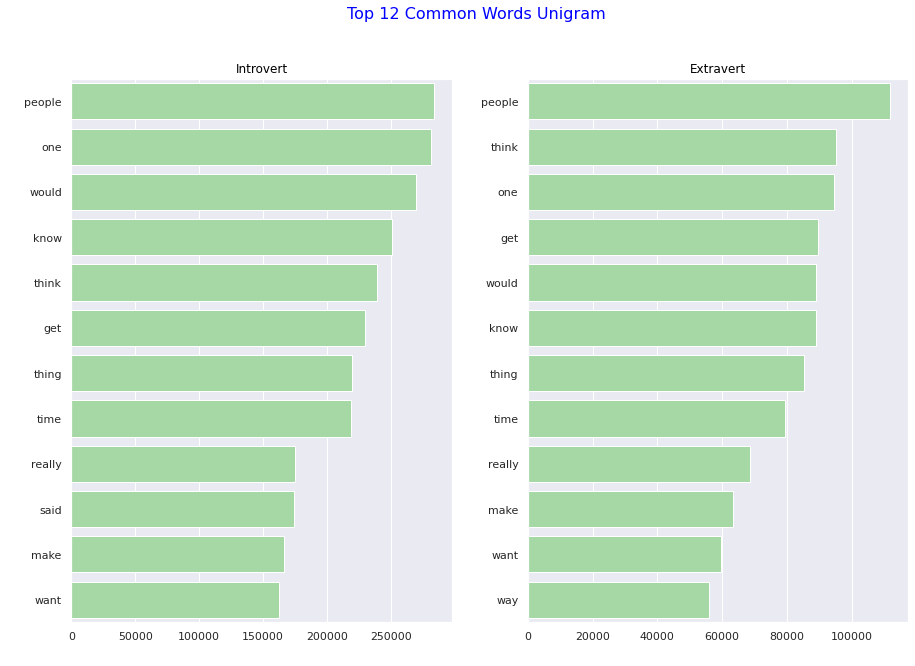

In [0]:
plot_topn_words(d1={'x': list(I_sorted_text_feature_dict.values()),
                    'y': list(I_sorted_text_feature_dict.keys())},
                d2={'x': list(E_sorted_text_feature_dict.values()),
                    'y': list(E_sorted_text_feature_dict.keys())},
                title={'d1': 'Introvert', 'd2': 'Extravert', 
                       'suptitle': 'Top {} Common Words Unigram'},
                colors={'title': 'black', 'bar': '#9ee09e'}, n=12)

<b> Observation(s): </b><br>
*  This shows that there are similar words that both Introverts and Extroverts uses.
*  Among the top 12 words, there are some words that introverts ranks higher than the extroverts' ie. think, said, & know.

<b> Unigrams [Intuitives/Sensors] </b>

In [0]:
# Intuitives
N_text_feature_dict = vectorize_words(X_train_N, max_df=0.45)
N_sorted_text_feature_dict = dict(sorted(N_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
N_sorted_text_occur = np.array(list(N_sorted_text_feature_dict.values()))

# Sensors
S_text_feature_dict = vectorize_words(X_train_S, max_df=0.45)
S_sorted_text_feature_dict = dict(sorted(S_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
S_sorted_text_occur = np.array(list(S_sorted_text_feature_dict.values()))

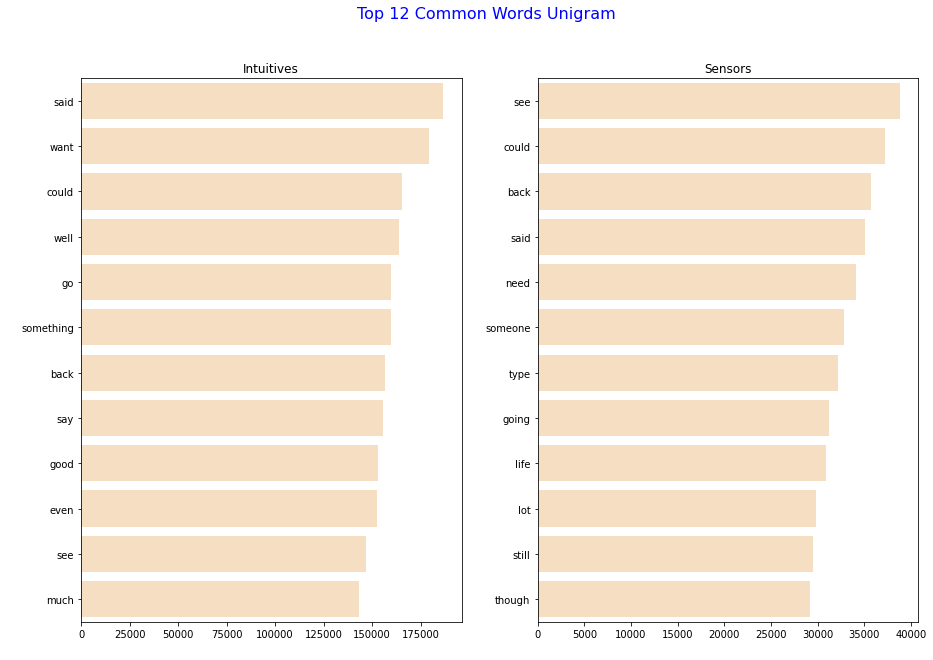

In [0]:
plot_topn_words(d1={'x': list(N_sorted_text_feature_dict.values()),
                    'y': list(N_sorted_text_feature_dict.keys())},
                d2={'x': list(S_sorted_text_feature_dict.values()),
                    'y': list(S_sorted_text_feature_dict.keys())},
                title={'d1': 'Intuitives', 'd2': 'Sensors', 
                       'suptitle': 'Top {} Common Words Unigram'},
                colors={'title': 'black', 'bar': '#ffdfba'}, n=12)

<b> Observation(s): </b><br>
*  There are some words that intuitives uses more often than the sensors', like: want, well, go, something, & even.

*  On the counterpart, there are some words that sensors uses more often than the intuitives', like: though, see, need, going, & still.

*  This is a good sign that a frequency based feature will be useful for our modeling.

<b> Unigrams [Thinkers/Feelers] </b>

In [0]:
# Thinkers
T_text_feature_dict = vectorize_words(X_train_T, max_df=0.45)
T_sorted_text_feature_dict = dict(sorted(T_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
T_sorted_text_occur = np.array(list(T_sorted_text_feature_dict.values()))

# Feelers
F_text_feature_dict = vectorize_words(X_train_F, max_df=0.45)
F_sorted_text_feature_dict = dict(sorted(F_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
F_sorted_text_occur = np.array(list(F_sorted_text_feature_dict.values()))

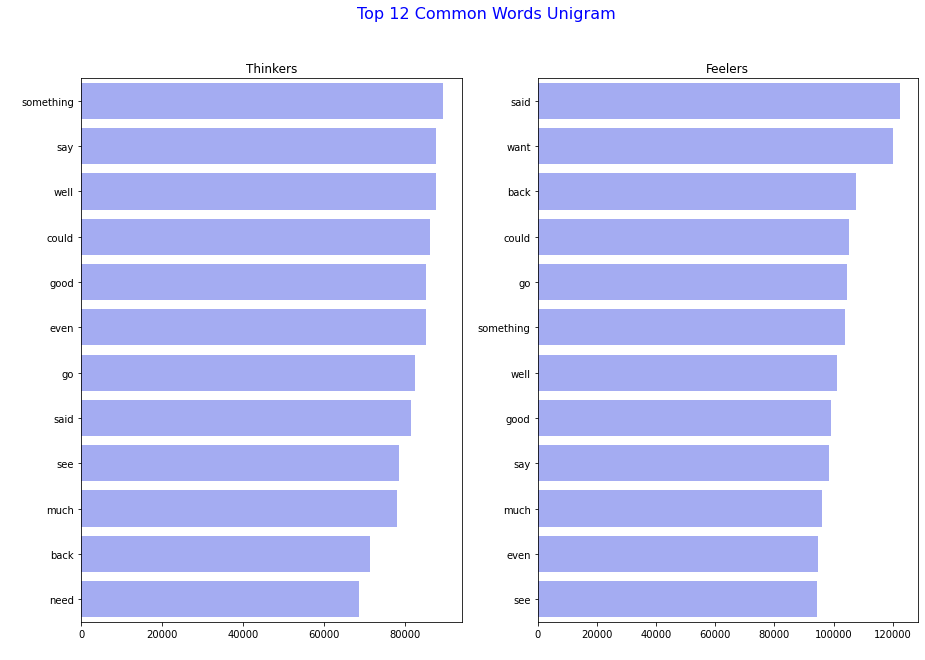

In [0]:
plot_topn_words(d1={'x': list(T_sorted_text_feature_dict.values()),
                    'y': list(T_sorted_text_feature_dict.keys())},
                d2={'x': list(F_sorted_text_feature_dict.values()),
                    'y': list(F_sorted_text_feature_dict.keys())},
                title={'d1': 'Thinkers', 'd2': 'Feelers', 
                       'suptitle': 'Top {} Common Words Unigram'},
                colors={'title': 'black', 'bar': '#97a2ff'}, n=12)

<b> Observation(s): </b><br>
*  There are some words that thinkers uses more often than the feeler', like: say, well, need, something, & even. This pattern looks much the same as the N-S types.

<b> Unigrams [Judging/Feeling]

In [0]:
# Judging
J_text_feature_dict = vectorize_words(X_train_J, max_df=0.4)
J_sorted_text_feature_dict = dict(sorted(J_text_feature_dict.items(), 
                                         key=lambda x: x[1], reverse=True))
J_sorted_text_occur = np.array(list(J_sorted_text_feature_dict.values()))

# Perceiving
P_text_feature_dict = vectorize_words(X_train_P, max_df=0.4)
P_sorted_text_feature_dict = dict(sorted(P_text_feature_dict.items(), 
                                       key=lambda x: x[1], reverse=True))
P_sorted_text_occur = np.array(list(P_sorted_text_feature_dict.values()))

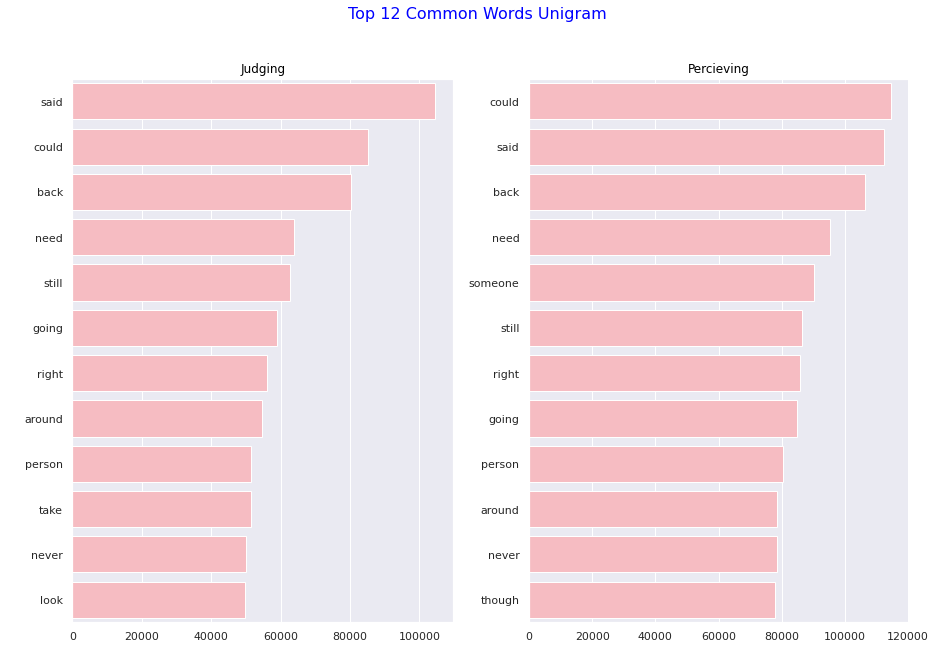

In [0]:
plot_topn_words(d1={'x': list(J_sorted_text_feature_dict.values()),
                    'y': list(J_sorted_text_feature_dict.keys())},
                d2={'x': list(P_sorted_text_feature_dict.values()),
                    'y': list(P_sorted_text_feature_dict.keys())},
                title={'d1': 'Judging', 'd2': 'Percieving', 
                       'suptitle': 'Top {} Common Words Unigram'},
                colors={'title': 'black', 'bar': '#ffb3ba'}, n=12)

<b> Observation(s): </b><br>
*  We can still see distinctive words used by Judgers vs. Feelers. We will for sure create a unigram TFIDF.

<b> Bigrams [Introverts/Extraverts] </b>

In [0]:
# Introverts
I_bi_text_feature_dict = vectorize_words(X_train_I, ngrams=(2,2), max_df=0.35)
I_bi_sorted_text_feature_dict = dict(sorted(I_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
I_bi_sorted_text_occur = np.array(list(I_bi_sorted_text_feature_dict.values()))

# Extraverts
E_bi_text_feature_dict = vectorize_words(X_train_E, ngrams=(2,2), max_df=0.35)
E_bi_sorted_text_feature_dict = dict(sorted(E_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
E_bi_sorted_text_occur = np.array(list(E_bi_sorted_text_feature_dict.values()))

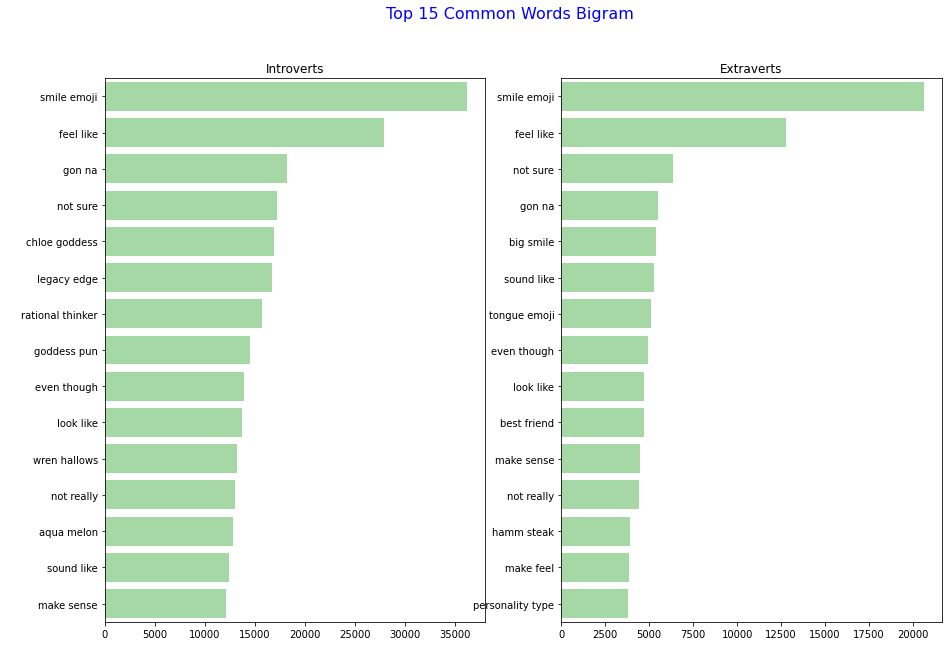

In [0]:
plot_topn_words(d1={'x': list(I_bi_sorted_text_feature_dict.values()),
                    'y': list(I_bi_sorted_text_feature_dict.keys())},
                d2={'x': list(E_bi_sorted_text_feature_dict.values()),
                    'y': list(E_bi_sorted_text_feature_dict.keys())},
                title={'d1': 'Introverts', 'd2': 'Extraverts', 
                       'suptitle': 'Top {} Common Words Bigram'},
                colors={'title': 'black', 'bar': '#9ee09e'}, n=15)

<b> Observation(s): </b><br>
*  Interestingly, there are emojis in the Bigrams representation. Extraverts uses tounge emoji and big smile emoji more often than the introverts (LOL).

* Other than the emojis, there are some words that is unique for Extraverts' top 12, like: make feel, best friend, and personality type.

* Some of the top words by introverts are usernames of top contributors of the forum. ie. Those who has the most likes, or those who has the most post. ie. chloe goddess, legacy edge, rational thinker, wren hallows, & aqua mellon.



<b> Bigrams [Intuitives/Sensors] </b>

In [0]:
# Intuitives
N_bi_text_feature_dict = vectorize_words(X_train_N, ngrams=(2,2), max_df=0.45)
N_bi_sorted_text_feature_dict = dict(sorted(N_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
N_bi_sorted_text_occur = np.array(list(N_bi_sorted_text_feature_dict.values()))

# Sensors
S_bi_text_feature_dict = vectorize_words(X_train_S, ngrams=(2,2), max_df=0.45)
S_bi_sorted_text_feature_dict = dict(sorted(S_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
S_bi_sorted_text_occur = np.array(list(S_bi_sorted_text_feature_dict.values()))

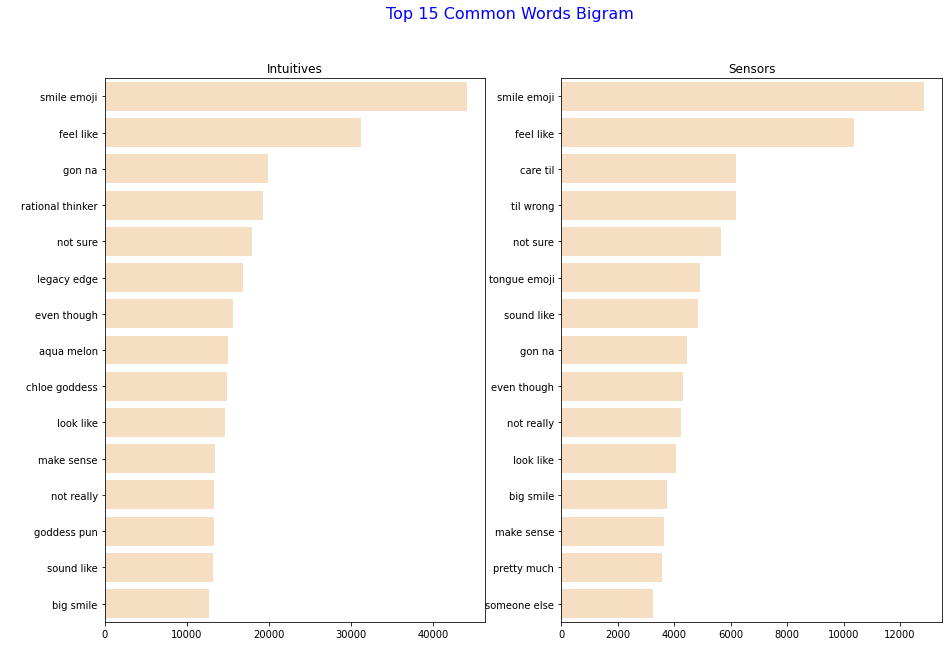

In [0]:
plot_topn_words(d1={'x': list(N_bi_sorted_text_feature_dict.values()),
                    'y': list(N_bi_sorted_text_feature_dict.keys())},
                d2={'x': list(S_bi_sorted_text_feature_dict.values()),
                    'y': list(S_bi_sorted_text_feature_dict.keys())},
                title={'d1': 'Intuitives', 'd2': 'Sensors', 
                       'suptitle': 'Top {} Common Words Bigram'},
                colors={'title': 'black', 'bar': '#ffdfba'}, n=15)

<b> Observation(s): </b><br>
*  Here there are also emojis in the Bigrams representation. Sensors uses tounge emoji and big smile emoji more often than the introverts (LOL again).

* There are some words that is unique for Sensor' top 12, like: pretty much, someone else, and til wrong.

* Here, the number of usernames in the top 12 was reduced compared to the I-E type.



<b> Bigrams [Thinkers/Feelers] </b>

In [0]:
# Thinkers
T_bi_text_feature_dict = vectorize_words(X_train_T, ngrams=(2,2), max_df=0.45)
T_bi_sorted_text_feature_dict = dict(sorted(T_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
T_bi_sorted_text_occur = np.array(list(T_bi_sorted_text_feature_dict.values()))

# Feelers
F_bi_text_feature_dict = vectorize_words(X_train_F, ngrams=(2,2), max_df=0.45)
F_bi_sorted_text_feature_dict = dict(sorted(F_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
F_bi_sorted_text_occur = np.array(list(F_bi_sorted_text_feature_dict.values()))

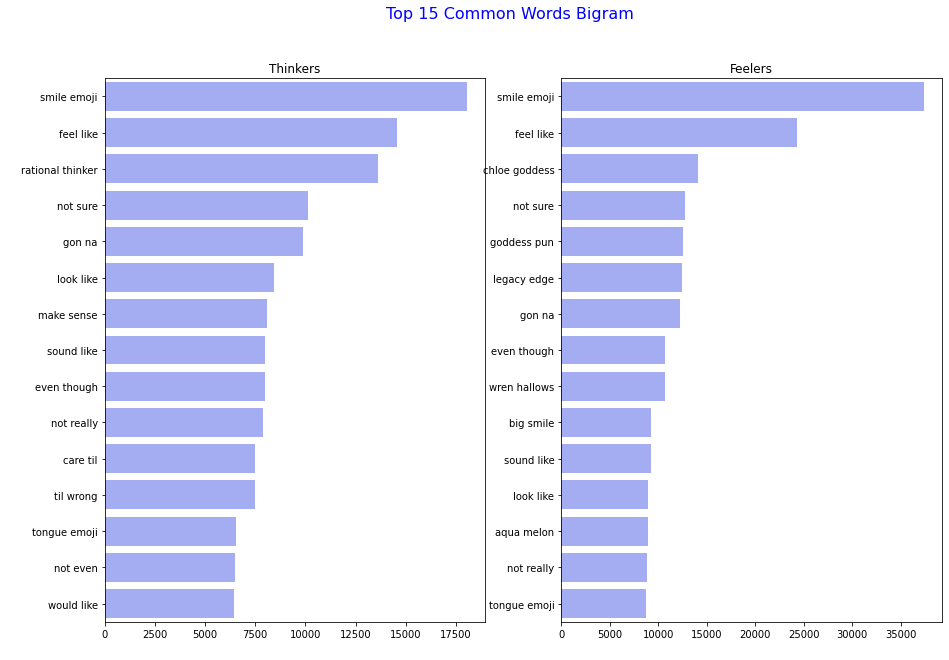

In [0]:
plot_topn_words(d1={'x': list(T_bi_sorted_text_feature_dict.values()),
                    'y': list(T_bi_sorted_text_feature_dict.keys())},
                d2={'x': list(F_bi_sorted_text_feature_dict.values()),
                    'y': list(F_bi_sorted_text_feature_dict.keys())},
                title={'d1': 'Thinkers', 'd2': 'Feelers', 
                       'suptitle': 'Top {} Common Words Bigram'},
                colors={'title': 'black', 'bar': '#97a2ff'}, n=15)

<b> Observation(s): </b><br>
*  There are some words a thinkers has on their top 12 that feelers didn't, like: would like, not even, & make sense.

*  Here, the usernames are fewer than the previous bigrams observations.



<b> Bigrams [Judgers/Perceivers] </b>

In [0]:
# Judgers
J_bi_text_feature_dict = vectorize_words(X_train_J, ngrams=(2,2), max_df=0.45)
J_bi_sorted_text_feature_dict = dict(sorted(J_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
J_bi_sorted_text_occur = np.array(list(J_bi_sorted_text_feature_dict.values()))

# Feelers
P_bi_text_feature_dict = vectorize_words(X_train_P, ngrams=(2,2), max_df=0.45)
P_bi_sorted_text_feature_dict = dict(sorted(P_bi_text_feature_dict.items(), 
                                          key=lambda x: x[1], reverse=True))
P_bi_sorted_text_occur = np.array(list(P_bi_sorted_text_feature_dict.values()))

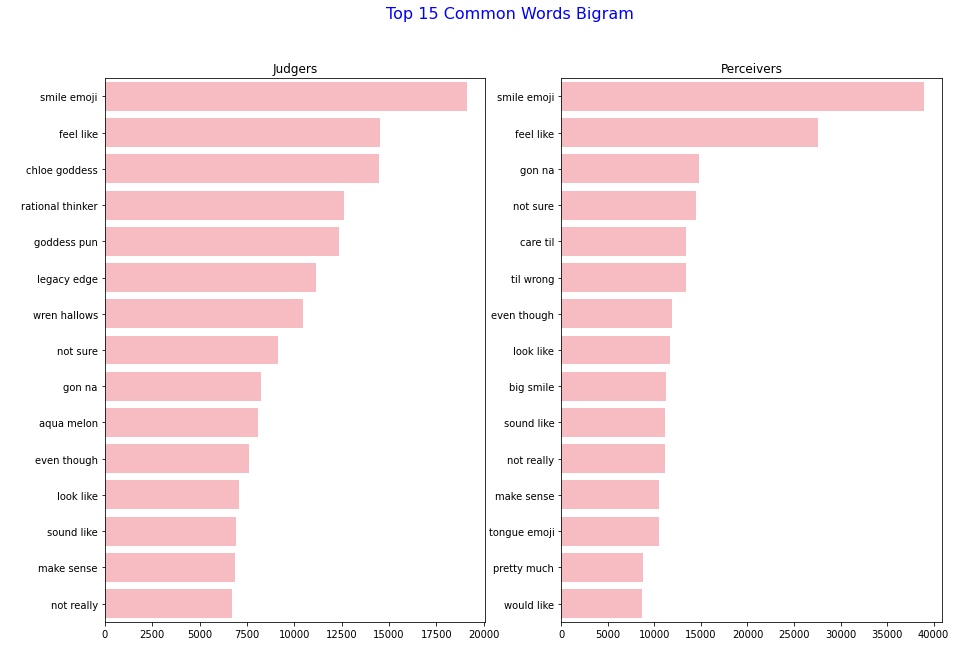

In [0]:
plot_topn_words(d1={'x': list(J_bi_sorted_text_feature_dict.values()),
                    'y': list(J_bi_sorted_text_feature_dict.keys())},
                d2={'x': list(P_bi_sorted_text_feature_dict.values()),
                    'y': list(P_bi_sorted_text_feature_dict.keys())},
                title={'d1': 'Judgers', 'd2': 'Perceivers', 
                       'suptitle': 'Top {} Common Words Bigram'},
                colors={'title': 'black', 'bar': '#ffb3ba'}, n=15)

<b> Observation(s): </b><br>
*  Here, although there are similar words for both types, we can see some difference on the frequencies. ie. not sure, even though, & look like.



<b> Trigrams [Introverts/Extraverts] </b>

In [0]:
# Introverts
I_tri_text_feature_dict = vectorize_words(X_train_I, ngrams=(3,3), max_df=0.45)
I_tri_sorted_text_feature_dict = dict(sorted(I_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
I_tri_sorted_text_occur = np.array(list(I_tri_sorted_text_feature_dict.values()))

# Extraverts
E_tri_text_feature_dict = vectorize_words(X_train_E, ngrams=(3,3), max_df=0.45)
E_tri_sorted_text_feature_dict = dict(sorted(E_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
E_tri_sorted_text_occur = np.array(list(E_tri_sorted_text_feature_dict.values()))

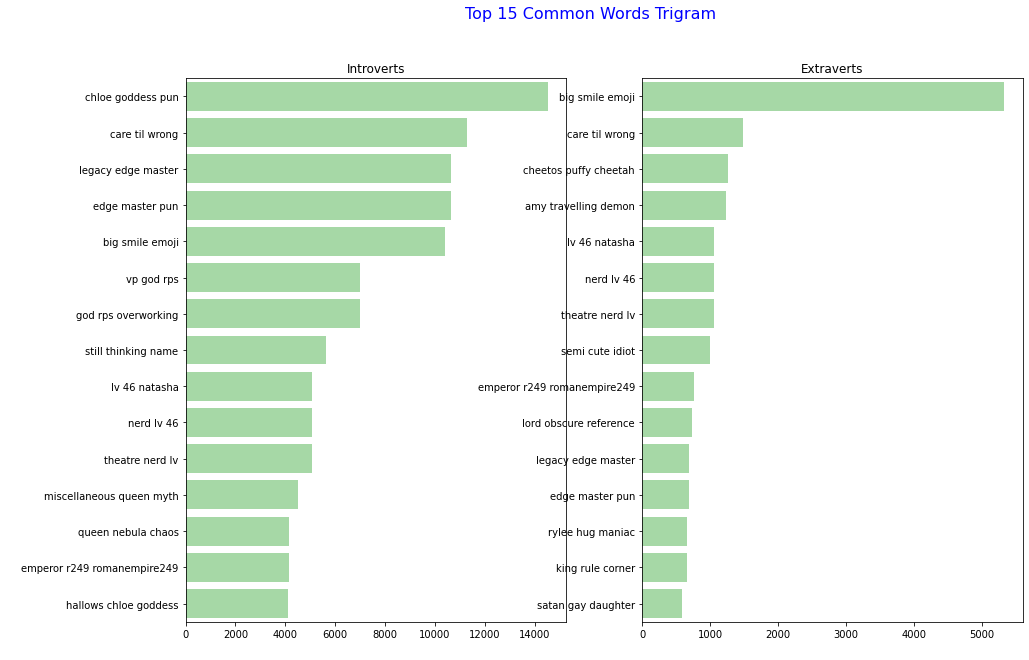

In [0]:
plot_topn_words(d1={'x': list(I_tri_sorted_text_feature_dict.values()),
                    'y': list(I_tri_sorted_text_feature_dict.keys())},
                d2={'x': list(E_tri_sorted_text_feature_dict.values()),
                    'y': list(E_tri_sorted_text_feature_dict.keys())},
                title={'d1': 'Introverts', 'd2': 'Extraverts', 
                       'suptitle': 'Top {} Common Words Trigram'},
                colors={'title': 'black', 'bar': '#9ee09e'}, n=15)

<b> Trigrams [Intuitives/Sensors] </b>

In [0]:
# Intuitives
N_tri_text_feature_dict = vectorize_words(X_train_N, ngrams=(3,3), max_df=0.45)
N_tri_sorted_text_feature_dict = dict(sorted(N_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
N_tri_sorted_text_occur = np.array(list(N_tri_sorted_text_feature_dict.values()))

# Sensors
S_tri_text_feature_dict = vectorize_words(X_train_S, ngrams=(3,3), max_df=0.45)
S_tri_sorted_text_feature_dict = dict(sorted(S_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
S_tri_sorted_text_occur = np.array(list(S_tri_sorted_text_feature_dict.values()))

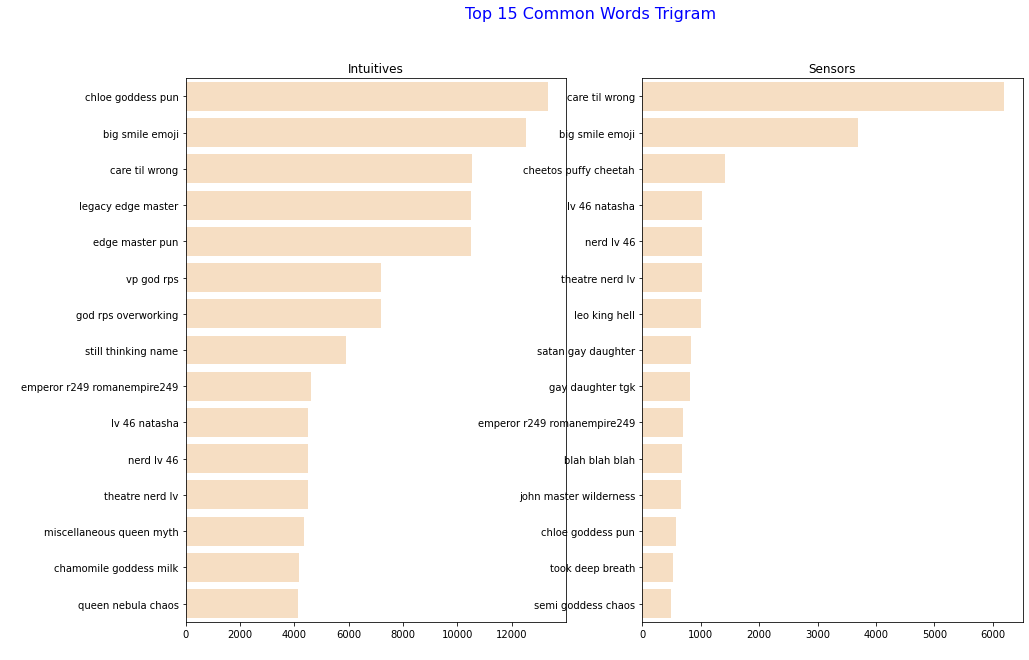

In [0]:
plot_topn_words(d1={'x': list(N_tri_sorted_text_feature_dict.values()),
                    'y': list(N_tri_sorted_text_feature_dict.keys())},
                d2={'x': list(S_tri_sorted_text_feature_dict.values()),
                    'y': list(S_tri_sorted_text_feature_dict.keys())},
                title={'d1': 'Intuitives', 'd2': 'Sensors', 
                       'suptitle': 'Top {} Common Words Trigram'},
                colors={'title': 'black', 'bar': '#ffdfba'}, n=15)

<b> Trigrams [Thinkers/Feelers] </b>

In [0]:
# Thinkers
T_tri_text_feature_dict = vectorize_words(X_train_T, ngrams=(3,3), max_df=0.45)
T_tri_sorted_text_feature_dict = dict(sorted(T_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
T_tri_sorted_text_occur = np.array(list(T_tri_sorted_text_feature_dict.values()))

# Feelers
F_tri_text_feature_dict = vectorize_words(X_train_F, ngrams=(3,3), max_df=0.45)
F_tri_sorted_text_feature_dict = dict(sorted(F_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
F_tri_sorted_text_occur = np.array(list(F_tri_sorted_text_feature_dict.values()))

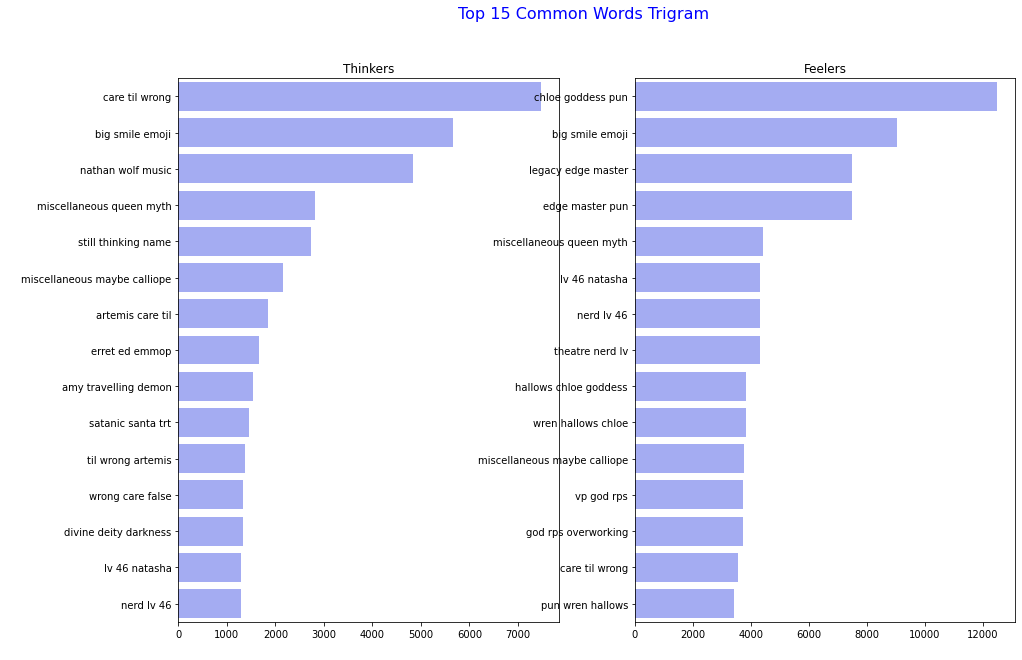

In [0]:
plot_topn_words(d1={'x': list(T_tri_sorted_text_feature_dict.values()),
                    'y': list(T_tri_sorted_text_feature_dict.keys())},
                d2={'x': list(F_tri_sorted_text_feature_dict.values()),
                    'y': list(F_tri_sorted_text_feature_dict.keys())},
                title={'d1': 'Thinkers', 'd2': 'Feelers', 
                       'suptitle': 'Top {} Common Words Trigram'},
                colors={'title': 'black', 'bar': '#97a2ff'}, n=15)

<b> Trigrams [Judgers/Perceivers] </b>

In [0]:
# Judgers
J_tri_text_feature_dict = vectorize_words(X_train_J, ngrams=(3,3), max_df=0.45)
J_tri_sorted_text_feature_dict = dict(sorted(J_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
J_tri_sorted_text_occur = np.array(list(J_tri_sorted_text_feature_dict.values()))

# Perceivers
P_tri_text_feature_dict = vectorize_words(X_train_P, ngrams=(3,3), max_df=0.45)
P_tri_sorted_text_feature_dict = dict(sorted(P_tri_text_feature_dict.items(), 
                                           key=lambda x: x[1], reverse=True))
P_tri_sorted_text_occur = np.array(list(P_tri_sorted_text_feature_dict.values()))

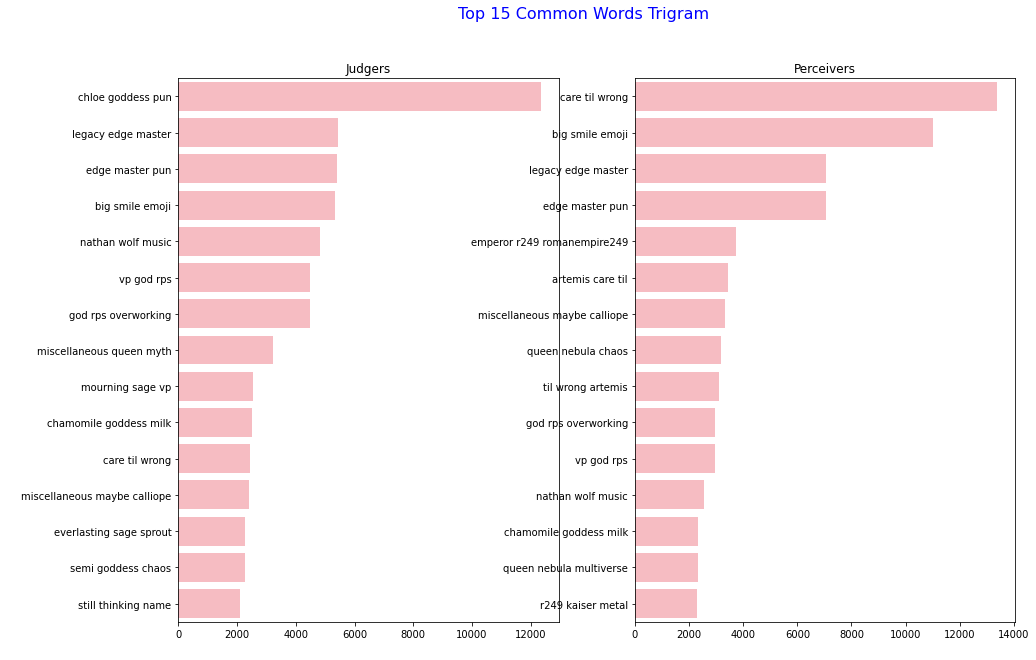

In [0]:
plot_topn_words(d1={'x': list(J_tri_sorted_text_feature_dict.values()),
                    'y': list(J_tri_sorted_text_feature_dict.keys())},
                d2={'x': list(P_tri_sorted_text_feature_dict.values()),
                    'y': list(P_tri_sorted_text_feature_dict.keys())},
                title={'d1': 'Judgers', 'd2': 'Perceivers', 
                       'suptitle': 'Top {} Common Words Trigram'},
                colors={'title': 'black', 'bar': '#ffb3ba'}, n=15)

<b> Observation(s): </b> <br> 
*  My Observation for the Trigrams features was that, most of the top words are usernames which seems not a rich information. With that, I decided to use only the Unigrams & Bigrams features. 

*  As a resolution for the username Bigram features which could be possibly a noise, in the later section, I will perform feature selection so that we can remove those features if ever they are irrelevant.

### 3.5.4 TFIDF

Since the tri gram analysis leads us to noisy features such as those usernames. With that in mind, I decided to use bi-grams and set the max_features parameter to 60000. This will reduce the chance of including those noisy features for tfidf.

In [0]:
tfidf = TfidfVectorizer(decode_error='replace', ngram_range=(i, i),  
                        max_features=60000, sublinear_tf=True)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

sparse.save_npz(OUTPUT_DIR + "X_train_tfidf.npz".format(i), X_train_tfidf)
sparse.save_npz(OUTPUT_DIR +  "X_test_tfidf.npz".format(i), X_test_tfidf)

<b> Merge TFIDF and Meta features </b>

In [0]:
X_train_tfidf_unibi = sparse.load_npz(OUTPUT_DIR + "X_train_tfidf.npz")
X_test_tfidf_unibi = sparse.load_npz(OUTPUT_DIR +  "X_test_tfidf.npz")

In [0]:
cols = ['type', 'I-E', 'N-S', 'T-F', 'J-P', 'post_count',
       'word_count', 'character_count', 'title_case_count', 'caps_count',
       'punct_count', 'emoji_count', 'alias_count', 'quoted_words_count',
       'digit_count', 'words_per_post', 'characters_per_post',
       'title_case_per_post', 'caps_per_post', 'puncts_per_post',
       'emoji_per_post', 'alias_per_post', 'quoted_words_per_post',
       'digit_count_per_post', 'NN', 'JJ', 'IN', 'NNS', 'VBN', 'VBD', 'RB',
       'VBP', 'VBG', 'VB', 'VBZ', 'CD', 'RBR', 'JJS', 'MD', 'PRP', 'TO', 'DT',
       'JJR', 'WDT', 'CC', 'FW', 'WP', 'NNP', 'RP', '$', 'WP$', 'UH', 'WRB',
       'RBS', 'EX', 'PRP$', 'NNPS', 'PDT', 'SYM', 'POS', '\'\'', '``']

feature_cols = ['post_count',
'word_count', 'character_count', 'title_case_count', 'caps_count',
'punct_count', 'emoji_count', 'alias_count', 'quoted_words_count',
'digit_count', 'words_per_post', 'characters_per_post',
'title_case_per_post', 'caps_per_post', 'puncts_per_post',
'emoji_per_post', 'alias_per_post', 'quoted_words_per_post',
'digit_count_per_post', 'NN', 'JJ', 'IN', 'NNS', 'VBN', 'VBD', 'RB',
'VBP', 'VBG', 'VB', 'VBZ', 'CD', 'RBR', 'JJS', 'MD', 'PRP', 'TO', 'DT',
'JJR', 'WDT', 'CC', 'FW', 'WP', 'NNP', 'RP', '$', 'WP$', 'UH', 'WRB',
'RBS', 'EX', 'PRP$', 'NNPS', 'PDT', 'SYM', 'POS', '\'\'', '``']

target_cols = ['I-E', 'N-S', 'T-F', 'J-P']

In [0]:
new_df = pd.read_csv(OUTPUT_DIR + 'df_with_meta_and_pos_features.csv', usecols=cols)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_df[feature_cols], 
                                                    new_df[target_cols], 
                                                    test_size=0.3, random_state=100,
                                                    stratify=new_df['type'])
X_train_meta = csr_matrix(X_train)
X_test_meta = csr_matrix(X_test)

In [0]:
X_train_tfidf = sparse.hstack([X_train_tfidf_unibi, X_train_meta])
X_test_tfidf = sparse.hstack([X_test_tfidf_unibi, X_test_meta])

## 4. Dealing with class imbalance problem

Class imbalance can be a problem when modeling. For instance, if we feed our dataset directly in a machine learning model, it will return a biased model which can lead to misinterpretation. And possibly in the end, it cannot generalize well on unseen data. As we've seen earlier, our dataset was suffering from class imbalance issue. Such issue can be resolved by applying oversampling or undersampling technique. For this project, I choose to use both of these techniques.

I will also perform feature normalization here to compensate with the algorithm that I am planning to use which is Logistic Regression.


Feature Normalization will often make Logistic Regression work better because it assumes its features to follow the gaussian distribution. Besides, it will also help the optimization algorithm to converge faster

In [0]:
rus = RandomUnderSampler(random_state=100)
ros = RandomOverSampler(random_state=100)
selector = SelectPercentile(f_classif, percentile=10)
std = StandardScaler(with_mean=False)
pipeline = Pipeline(steps=[ ('std', std),
                            ('o', ros),
                            ('u', rus),
                            ('s', selector)])
  
for t in target_columns:
  pipeline.fit(X_train_tfidf, y_train[t])
  sparse.save_npz(OUTPUT_DIR + 'train_final_features_' + t, 
                  pipeline.transform(X_train_tfidf))
  sparse.save_npz(OUTPUT_DIR + 'test_final_features_' + t, 
                  pipeline.transform(X_test_tfidf))

# 5. Machine Learning

In [0]:
def show_scores(y_true, y_pred):
  tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
  print("Accuracy :", metrics.accuracy_score(y_true,y_pred))
  print("Precision Score :", metrics.precision_score(y_true,y_pred))
  print("Recall Score :", metrics.recall_score(y_true,y_pred))
  print("F1 Score :", metrics.f1_score(y_true,y_pred))
  print('TPR: ', tp/(tp+fn))
  print('FPR: ', tn/(tn+fp))
  # print("Precision Recall Report :\n", metrics.classification_report(y_true, y_pred, zero_division=1))

In [0]:
X_train_IE = sparse.load_npz(OUTPUT_DIR + 'train_final_features_I-E.npz')
X_train_NS = sparse.load_npz(OUTPUT_DIR + 'train_final_features_N-S.npz')
X_train_TF = sparse.load_npz(OUTPUT_DIR + 'train_final_features_T-F.npz')
X_train_JP = sparse.load_npz(OUTPUT_DIR + 'train_final_features_J-P.npz')

In [0]:
X_test_IE = sparse.load_npz(OUTPUT_DIR + 'test_final_features_I-E.npz')
X_test_NS = sparse.load_npz(OUTPUT_DIR + 'test_final_features_N-S.npz')
X_test_TF = sparse.load_npz(OUTPUT_DIR + 'test_final_features_T-F.npz')
X_test_JP = sparse.load_npz(OUTPUT_DIR + 'test_final_features_J-P.npz')

## 5.2 Modeling and Evalutaion

Since I am planning to deploy this as a web application, I am going to train an algorithm that has a low to medium training time complexity. 

<br>
<h4>This might be a bit technical but what I have in mind are: </h4>


Let n = number of rows; d = number of dimensions; k = number of support vectors; c = number of classes.


1.) Logistic Regression - is a linear model which assumes a binary class output variable and no multi collinearity among the features. I chose this because it performs very well on high dimensional data, the higher the dimension, the more probability that the linear boundary is present. Its train time complexity is also cheap: ```O(n*d)``` given that we only have ~27k training size. It only takes ```O(d)``` time to evaluate a new sample because it only needs the learned weights to calculate its predictions.

2.) Naive Bayes - was known for performing well on text classification task which is why I've chosen this. It assumes that its features are independent to each other, thus the name naive. The train time complexity of Naive Bayes is ```O(n*d)``` which is for computing the probabilities for each features. The evalutation time complexity of Naive Bayes is ```O(c*d)```, which makes it very fast for large scale datasets.


3.) SVM - also has its Linear form or Linear kernel, thus will also have the probability to perform well on high dimensional space. The tradeoff here is its training time complexity ```O(n^3)```, this shows that this model will not scale in the long run (maybe use batch SGD?). Its evaluation time is also high, even with the dual form ```O(k*d)``` where k is the number of support vectors which is needed to classify a new datapoint.

In [0]:
logreg_params = {'alpha': [10**-i for i in range(6, 16)], 'penalty': ['l2', 'l1']}
nb_params = {'alpha': [10**i for i in range(0, 5)]}
 
logreg_clf = SGDClassifier(loss='log', random_state=100)
nb_clf = MultinomialNB()
 
clf_input = {'logreg': {'clf': logreg_clf, 'params': logreg_params},
            #  'svm': {'clf': svm_clf, 'params': svm_params},
             'nb': {'clf': nb_clf, 'params': nb_params}}

In [0]:
clf_output = {'I-E': [], 'N-S': [], 'T-F': [], 'J-P': []}
train_dict = {'I-E': X_train_IE, 'N-S': X_train_NS,
              'T-F': X_train_TF, 'J-P': X_train_JP}
types = list(clf_output.keys())

In [79]:
for t in types:
  print('Current class:', t)
  for key in list(clf_input.keys()):
    if key == 'nb':
      continue
    print('Current Algorithm:', key.upper())
    curr_clf = clf_input[key]['clf']
    curr_params = clf_input[key]['params']
    grid_cv = GridSearchCV(estimator=curr_clf, param_grid=curr_params, cv=5, 
                           return_train_score=True,
                           scoring='f1', verbose=3)
    start = time.time()
    grid_cv.fit(train_dict[t], y_train[t])
    end = time.time()
    print('Training Time of {}: {}'.format(key.upper(), round(end-start, 2)))
    output = {key: grid_cv}
    clf_output[t].append(output)

Current class: I-E
Current Algorithm: LOGREG
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1e-06, penalty=l2, score=(train=0.937, test=0.809), total=   2.2s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.929, test=0.811), total=   1.1s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.937, test=0.811), total=   2.1s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.935, test=0.804), total=   1.8s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.938, test=0.801), total=   2.2s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.952, test=0.803), total=  20.8s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.952, test=0.806), total=  16.9s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.954, test=0.802), total=  18.6s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.952, test=0.799), total=  16.5s
[CV] alpha=1e-06, penalty=l1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.0min finished


Training Time of LOGREG: 304.41
Current class: N-S
Current Algorithm: LOGREG
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1e-06, penalty=l2, score=(train=0.968, test=0.852), total=   2.0s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.962, test=0.849), total=   1.5s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.5s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.967, test=0.850), total=   2.5s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.969, test=0.852), total=   2.2s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.972, test=0.853), total=   3.3s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.987, test=0.843), total=  31.6s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.986, test=0.848), total=  19.7s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.985, test=0.847), total=  14.7s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.987, test=0.839), total=  27.1s
[CV] alpha=1e-06, penalty=l1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.7min finished


Training Time of LOGREG: 463.46
Current class: T-F
Current Algorithm: LOGREG
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1e-06, penalty=l2, score=(train=0.824, test=0.636), total=   4.4s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.828, test=0.617), total=   3.6s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.1s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.822, test=0.645), total=   2.9s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.823, test=0.627), total=   4.0s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.819, test=0.625), total=   3.7s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.865, test=0.624), total=  31.3s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.872, test=0.603), total=  34.5s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.860, test=0.638), total=  27.8s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.866, test=0.620), total=  38.2s
[CV] alpha=1e-06, penalty=l1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.3min finished


Training Time of LOGREG: 438.28
Current class: J-P
Current Algorithm: LOGREG
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=1e-06, penalty=l2, score=(train=0.814, test=0.598), total=   1.7s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.818, test=0.607), total=   2.4s
[CV] alpha=1e-06, penalty=l2 .........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.1s remaining:    0.0s


[CV]  alpha=1e-06, penalty=l2, score=(train=0.826, test=0.598), total=   4.0s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.813, test=0.616), total=   2.8s
[CV] alpha=1e-06, penalty=l2 .........................................
[CV]  alpha=1e-06, penalty=l2, score=(train=0.814, test=0.606), total=   3.0s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.863, test=0.596), total=  17.3s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.864, test=0.595), total=  27.2s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.867, test=0.591), total=   9.5s
[CV] alpha=1e-06, penalty=l1 .........................................
[CV]  alpha=1e-06, penalty=l1, score=(train=0.859, test=0.608), total=  13.0s
[CV] alpha=1e-06, penalty=l1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.0min finished


Training Time of LOGREG: 302.84


### 5.2.3 Logistic Regression

In [0]:
test_dict = {'I-E': X_test_IE, 'N-S': X_test_NS, 'T-F': X_test_TF, 'J-P': X_test_JP}
logreg_pred = {}

In [0]:
for t in types:
  logreg_pred[t] = clf_output[t][0]['logreg'].predict(test_dict[t])

In [148]:
for t in types:
  print(t)
  show_scores(y_test[t], logreg_pred[t])
  print('\n')

I-E
Accuracy : 0.730437013597879
Precision Score : 0.7791372874326006
Recall Score : 0.8802717900656045
F1 Score : 0.8266226622662266
TPR:  0.8802717900656045
FPR:  0.32530883750395945


N-S
Accuracy : 0.81604378688104
Precision Score : 0.8569927397783722
Recall Score : 0.932051948051948
F1 Score : 0.8929477927636489
TPR:  0.932051948051948
FPR:  0.2761121856866538


T-F
Accuracy : 0.70931326434619
Precision Score : 0.6868642193719593
Recall Score : 0.610336018864217
F1 Score : 0.6463427322859223
TPR:  0.610336018864217
FPR:  0.7855844942459116


J-P
Accuracy : 0.6588557256478235
Precision Score : 0.5755274261603376
Recall Score : 0.4520547945205479
F1 Score : 0.506372973641876
TPR:  0.4520547945205479
FPR:  0.7894516534114693




<b> Confusion Matrix </b>

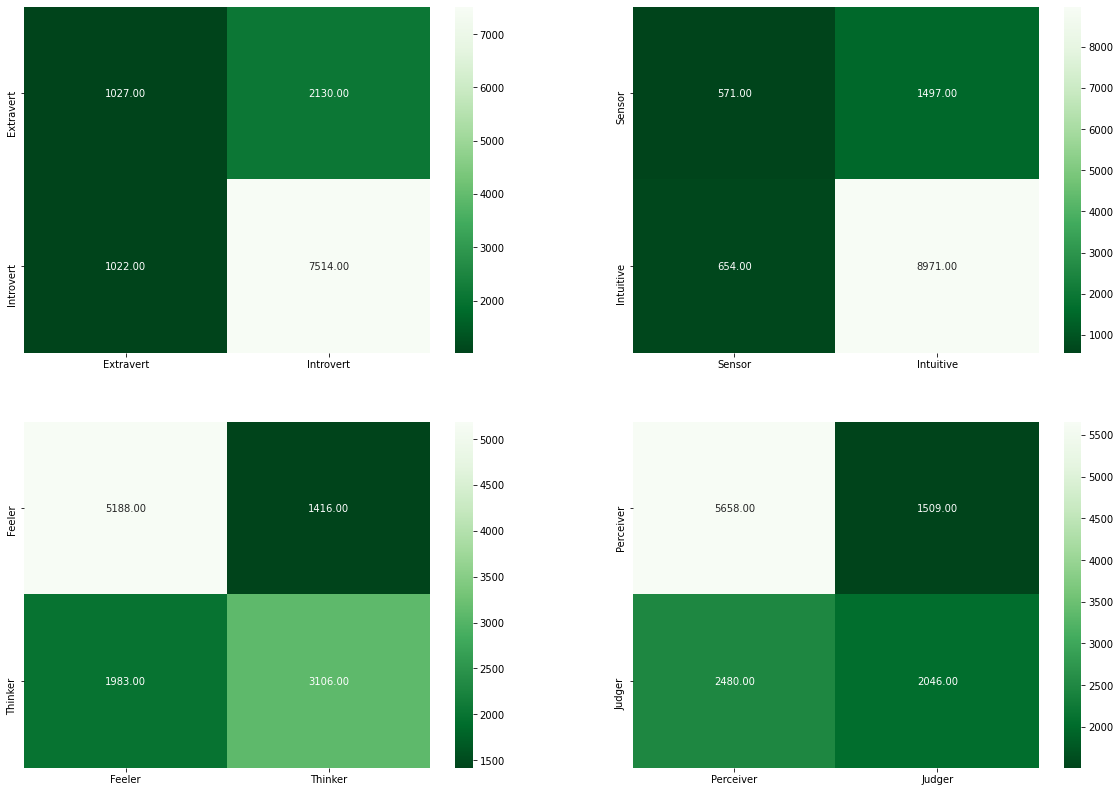

In [94]:
titles = {'I-E': ['Extravert', 'Introvert'], 'N-S':['Sensor', 'Intuitive'],
          'T-F': ['Feeler', 'Thinker'], 'J-P': ['Perceiver', 'Judger']}

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for t, ax in zip(types, axes.flatten()):
  tmp_cm = metrics.confusion_matrix(y_test[t], logreg_pred[t])
  sns.heatmap(tmp_cm, annot=True, fmt='0.2f', ax=ax, xticklabels=titles[t],
              yticklabels=titles[t], cmap='Greens_r')
plt.show()

<b> Train/CV Error Analysis </b>

In [0]:
logreg_train_score = {}
logreg_cv_score = {}

for t in types:
  logreg_train_score[t] = clf_output[t][0]['logreg'].cv_results_['mean_train_score']
  logreg_cv_score[t] = clf_output[t][0]['logreg'].cv_results_['mean_test_score']

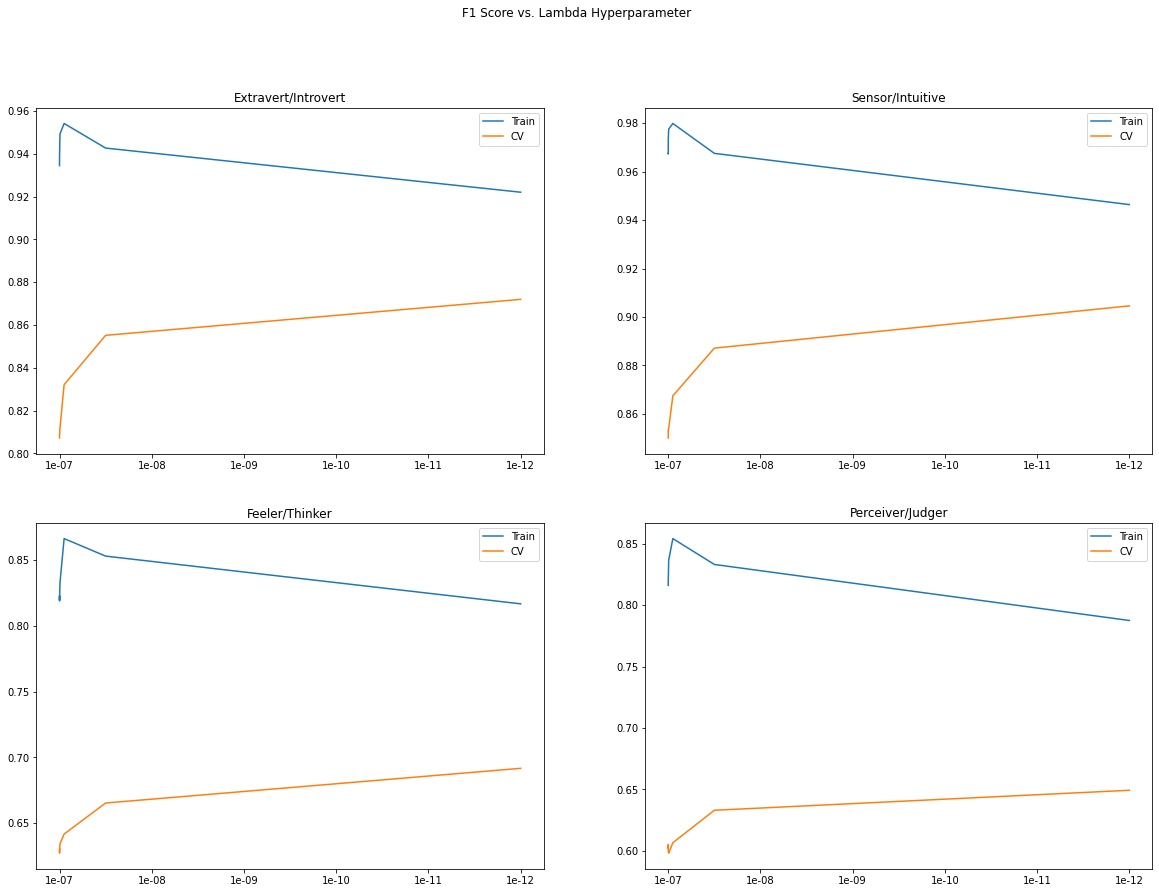

In [89]:
titles = {'I-E': ['Extravert', 'Introvert'], 'N-S':['Sensor', 'Intuitive'],
          'T-F': ['Feeler', 'Thinker'], 'J-P': ['Perceiver', 'Judger']}

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
fig.suptitle('F1 Score vs. Lambda Hyperparameter')
for t, ax in zip(types, axes.flatten()):
  ax.plot([10**-i for i in range(6, 16)][3:], logreg_train_score[t], label='Train')
  ax.plot(logreg_params['alpha'][3:], logreg_cv_score[t], label='CV')
  ax.set_title('/'.join(titles[t]))
  ax.set_xticklabels(logreg_params['alpha'])
  ax.legend()
plt.show()

### 5.2.4 Naive Bayes

In [0]:
nb_pred = {}
for t in types:
  nb_pred[t] = clf_output[t][1]['nb'].predict(test_dict[t])

In [150]:
for t in types:
  print(t)
  show_scores(y_test[t], nb_pred[t])
  print('\n')

I-E
Accuracy : 0.7322329598905328
Precision Score : 0.7731729505711109
Recall Score : 0.896087160262418
F1 Score : 0.8301047262466763
TPR:  0.896087160262418
FPR:  0.289198606271777


N-S
Accuracy : 0.8120242880355768
Precision Score : 0.8452170679557497
Recall Score : 0.9446233766233766
F1 Score : 0.8921597487979589
TPR:  0.9446233766233766
FPR:  0.1948742746615087


T-F
Accuracy : 0.6906696314034038
Precision Score : 0.6647269471799463
Recall Score : 0.5836117115346826
F1 Score : 0.6215339541697185
TPR:  0.5836117115346826
FPR:  0.773167777104785


J-P
Accuracy : 0.6383306251603523
Precision Score : 0.5322896281800391
Recall Score : 0.5408749447635881
F1 Score : 0.5365479452054794
TPR:  0.5408749447635881
FPR:  0.6998744244453746




<b> Confusion Matrix </b>

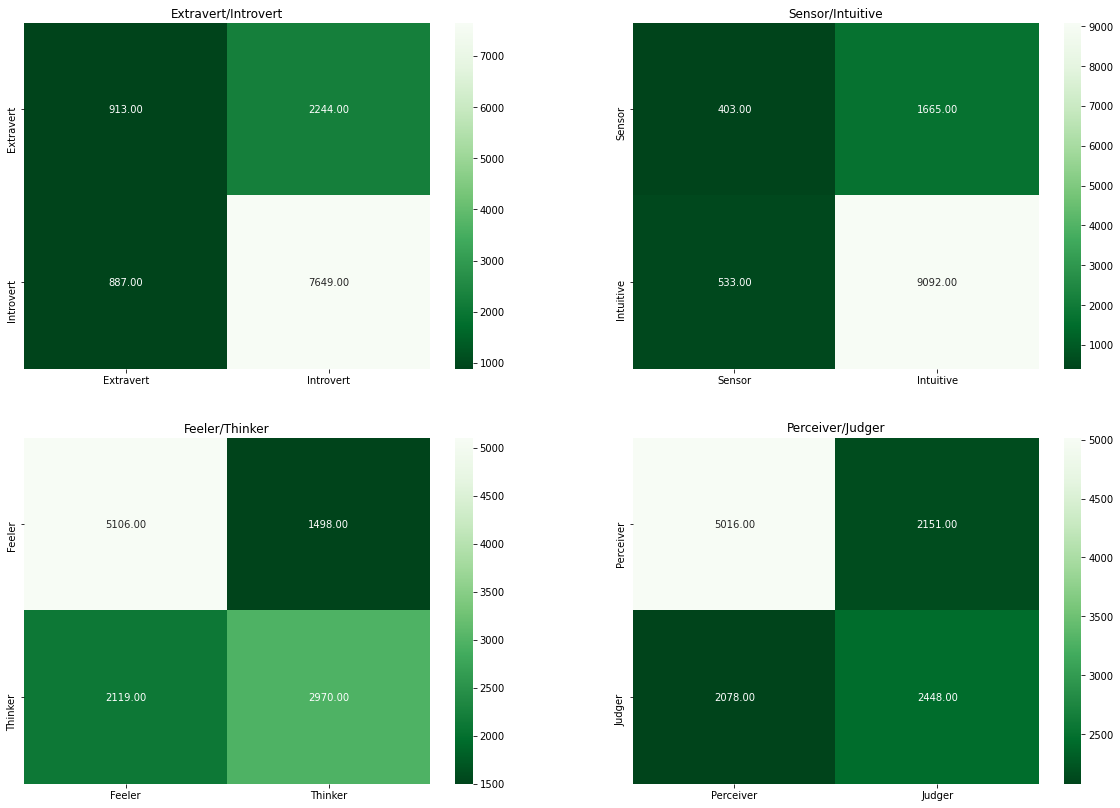

In [0]:
titles = {'I-E': ['Extravert', 'Introvert'], 'N-S':['Sensor', 'Intuitive'],
          'T-F': ['Feeler', 'Thinker'], 'J-P': ['Perceiver', 'Judger']}

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for t, ax in zip(types, axes.flatten()):
  tmp_cm = metrics.confusion_matrix(y_test[t], nb_pred[t])
  sns.heatmap(tmp_cm, annot=True, fmt='0.2f', ax=ax, xticklabels=titles[t],
              yticklabels=titles[t], cmap='Greens_r')
plt.show()

<b> Train/CV Error Analysis </b>

In [0]:
nb_train_score = {}
nb_cv_score = {}

for t in types:
  nb_train_score[t] = clf_output[t][1]['nb'].cv_results_['mean_train_score']
  nb_cv_score[t] = clf_output[t][1]['nb'].cv_results_['mean_test_score']

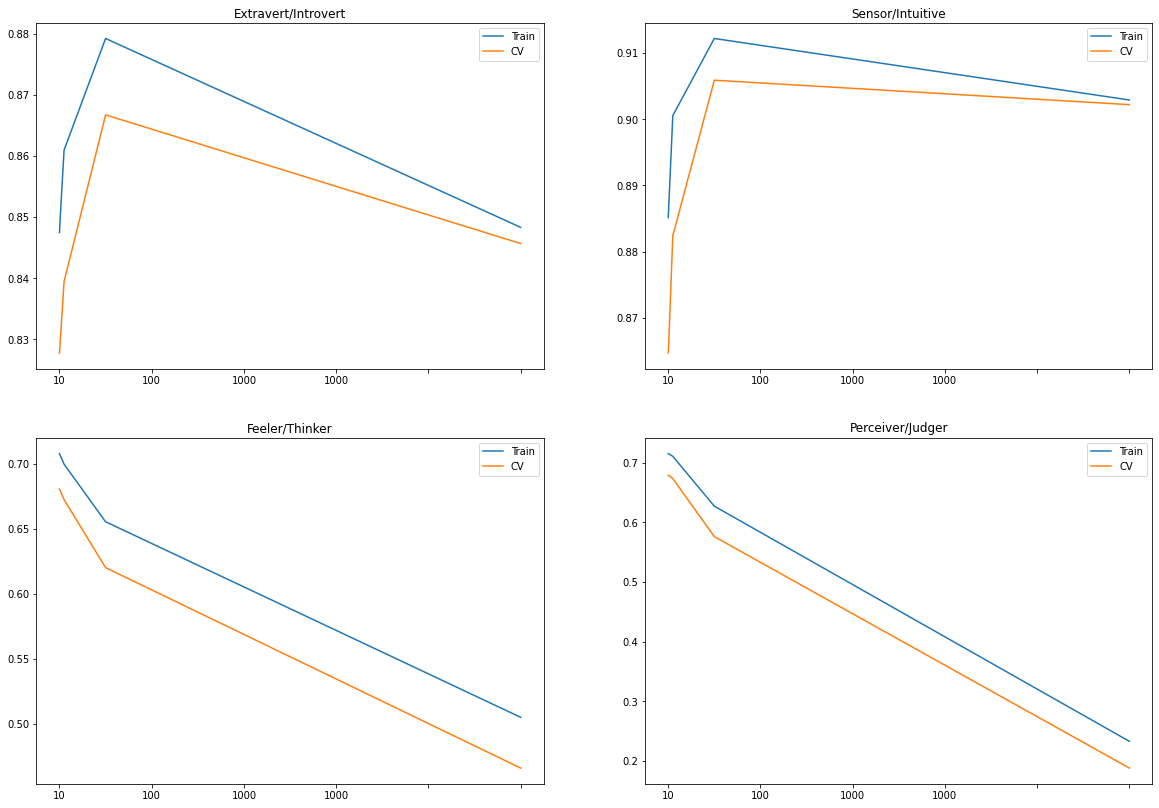

In [92]:
fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for t, ax in zip(types, axes.flatten()):
  ax.plot([1, 10, 100, 1000, 10000], nb_train_score[t], label='Train')
  ax.plot([1, 10, 100, 1000, 10000], nb_cv_score[t], label='CV')
  ax.set_title('/'.join(titles[t]))
  ax.set_xticklabels([1, 10, 100, 1000, 1000])
  ax.legend()
plt.show()

### 5.2.5 SVM

In [0]:
svm_params = {'C': [10**i for i in range(-10, -2)]}
svm_clf = LinearSVC(random_state=100, penalty='l2')

In [104]:
for t in types:
  print('Current class:', t)
  grid_cv = GridSearchCV(estimator=svm_clf, param_grid=svm_params, cv=5, 
                          return_train_score=True,
                          scoring='f1', verbose=3)
  start = time.time()
  grid_cv.fit(train_dict[t], y_train[t])
  end = time.time()
  print('Training Time of SVM: {}'.format(round(end-start, 2)))
  output = {'svm': grid_cv}
  clf_output[t].append(output)

Current class: I-E
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=1e-10, score=(train=0.844, test=0.844), total=   0.2s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.844, test=0.844), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   16.0s finished


Training Time of NB: 16.33
Current class: N-S
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=1e-10, score=(train=0.903, test=0.903), total=   0.3s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.903, test=0.903), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.903, test=0.903), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.903, test=0.903), total=   0.2s
[CV] C=1e-09 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   21.4s finished


Training Time of NB: 21.76
Current class: T-F
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.495, test=0.469), total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.510, test=0.456), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.488, test=0.449), total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.465, test=0.436), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.489, test=0.461), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.495, test=0.469), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.510, test=0.456), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.488, test=0.449), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.466, test=0.438), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.489, test=0.461), total=   0.1s
[CV] C=1e-08 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   25.2s finished


Training Time of NB: 25.52
Current class: J-P
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.021, test=0.017), total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.019, test=0.014), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.022, test=0.010), total=   0.1s
[CV] C=1e-10 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ......... C=1e-10, score=(train=0.019, test=0.012), total=   0.1s
[CV] C=1e-10 .........................................................
[CV] ......... C=1e-10, score=(train=0.020, test=0.011), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.021, test=0.017), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.019, test=0.014), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.022, test=0.010), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.019, test=0.012), total=   0.1s
[CV] C=1e-09 .........................................................
[CV] ......... C=1e-09, score=(train=0.021, test=0.011), total=   0.1s
[CV] C=1e-08 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   16.4s finished


Training Time of NB: 17.09


In [152]:
svm_pred = {}
for t in types:
  svm_pred[t] = clf_output[t][3]['svm'].predict(test_dict[t])

for t in types:
  print(t)
  show_scores(y_test[t], svm_pred[t])  
  print('\n')

I-E
Accuracy : 0.7411271701017703
Precision Score : 0.76626389560174
Recall Score : 0.9286551077788191
F1 Score : 0.8396801016895292
TPR:  0.9286551077788191
FPR:  0.23408299018055115


N-S
Accuracy : 0.8298127084580518
Precision Score : 0.8458820331611852
Recall Score : 0.9699740259740259
F1 Score : 0.9036879295324751
TPR:  0.9699740259740259
FPR:  0.17746615087040618


T-F
Accuracy : 0.7180364320533653
Precision Score : 0.7107243650047037
Recall Score : 0.5938298290430339
F1 Score : 0.6470399314848517
TPR:  0.5938298290430339
FPR:  0.8137492428831011


J-P
Accuracy : 0.6528692380056444
Precision Score : 0.5644849489091411
Recall Score : 0.45161290322580644
F1 Score : 0.5017797962440163
TPR:  0.45161290322580644
FPR:  0.7799637226175526




<b> Confusion Matrix </b>

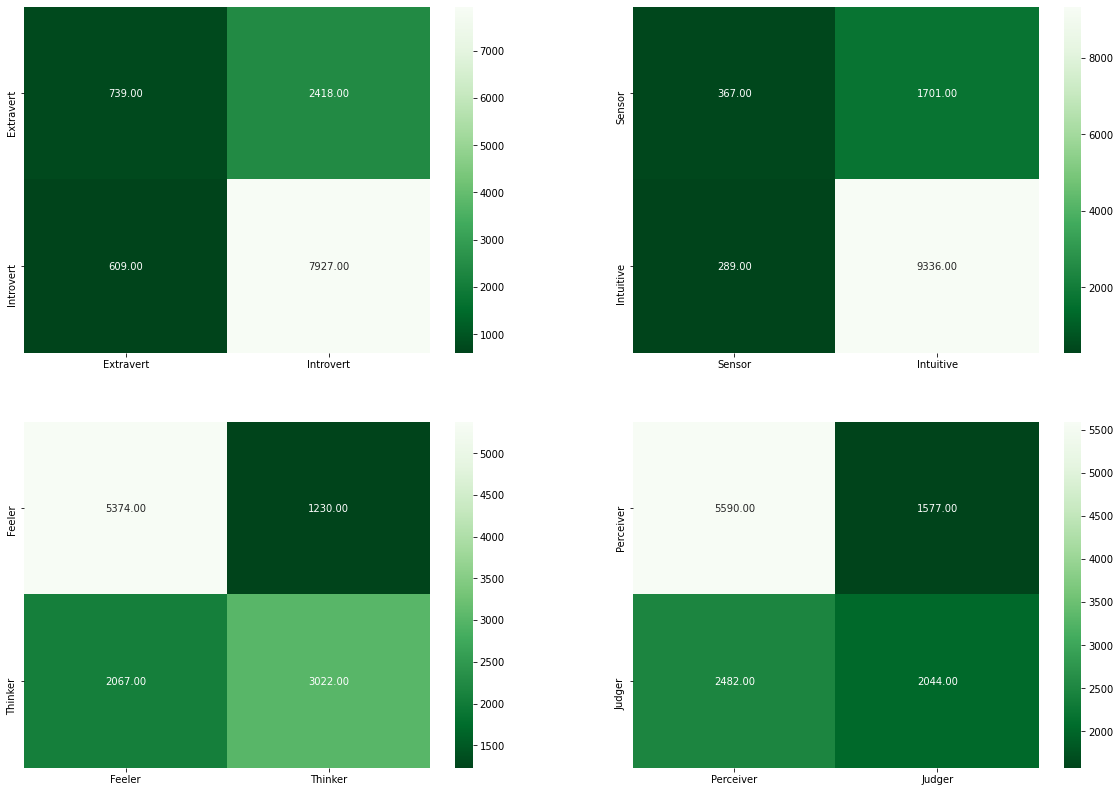

In [115]:
titles = {'I-E': ['Extravert', 'Introvert'], 'N-S':['Sensor', 'Intuitive'],
          'T-F': ['Feeler', 'Thinker'], 'J-P': ['Perceiver', 'Judger']}

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for t, ax in zip(types, axes.flatten()):
  tmp_cm = metrics.confusion_matrix(y_test[t], svm_pred[t])
  sns.heatmap(tmp_cm, annot=True, fmt='0.2f', ax=ax, xticklabels=titles[t],
              yticklabels=titles[t], cmap='Greens_r')
plt.show()

<b> Train/CV Error Analysis </b>

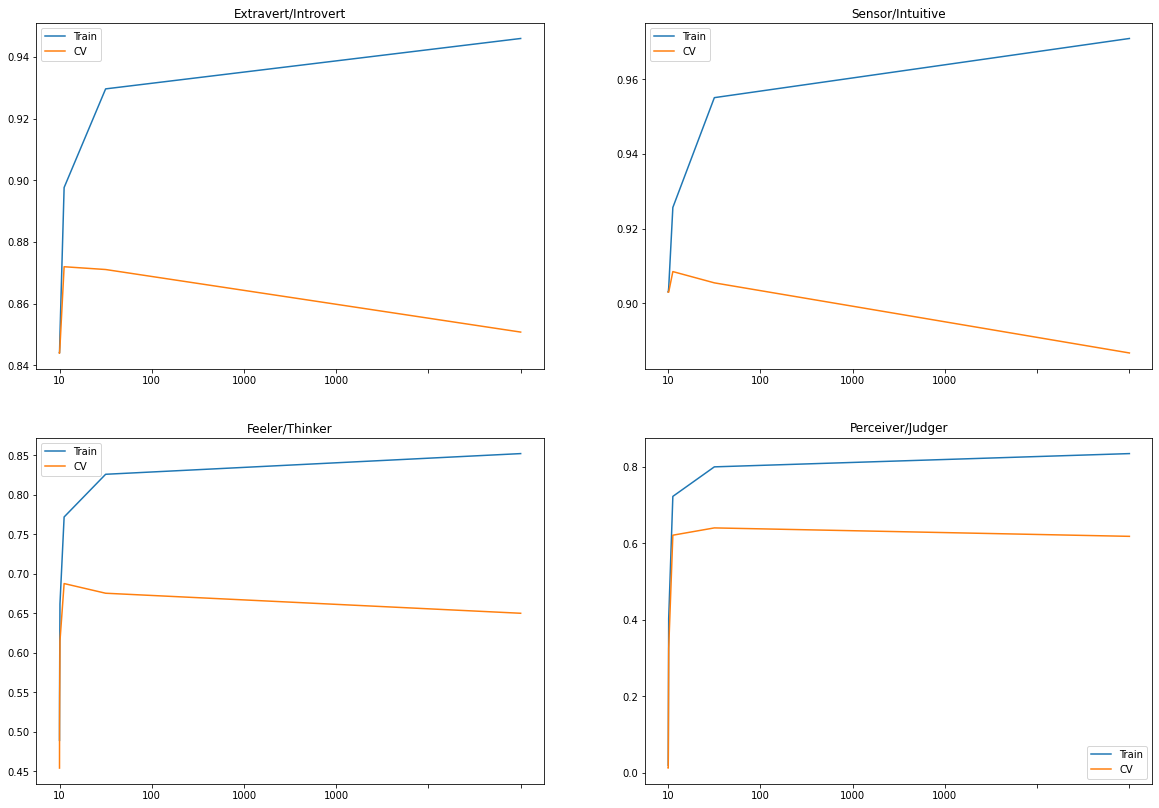

In [118]:
svm_train_score = {}
svm_cv_score = {}

for t in types:
  svm_train_score[t] = clf_output[t][3]['svm'].cv_results_['mean_train_score']
  svm_cv_score[t] = clf_output[t][3]['svm'].cv_results_['mean_test_score']

fig, axes = plt.subplots(2, 2, figsize=(20, 14))
for t, ax in zip(types, axes.flatten()):
  ax.plot(svm_params['C'], svm_train_score[t], label='Train')
  ax.plot(svm_params['C'], svm_cv_score[t], label='CV')
  ax.set_title('/'.join(titles[t]))
  ax.set_xticklabels([1, 10, 100, 1000, 1000])
  ax.legend()
plt.show()

# 6. Conclusions

In [153]:
x = PrettyTable()

x.field_names = ["MODEL NAME", "CLASS", "PRECISION", "RECALL", "F1 SCORE"]

x.add_row(["", '', '', '', ''])
x.add_row(["Logistic Regression", 'Introvert vs. Extravert', 77.91, 88.03, 82.67])
x.add_row(["Logistic Regression", 'Intuitive vs. Sensor', 85.70, 93.20, 89.29])
x.add_row(["Logistic Regression", 'Thinking vs. Feeling', 68.70, 61.03, 64.63])
x.add_row(["Logistic Regression", 'Judging vs. Perceiving', 57.55, 45.20, 50.64])
x.add_row(["", '', '', '', ''])

x.add_row(["Multinomial Naive Bayes", 'Introvert vs. Extravert', 77.32, 89.61, 83.01])
x.add_row(["Multinomial Naive Bayes", 'Intuitive vs. Sensor', 84.52, 94.46, 89.21])
x.add_row(["Multinomial Naive Bayes", 'Thinking vs. Feeling', 66.47, 58.36, 62.15])
x.add_row(["Multinomial Naive Bayes", 'Judging vs. Perceiving', 53.22, 54.10, 53.65])
x.add_row(["", '', '', '', ''])

x.add_row(["Linear Kernel SVM", 'Introvert vs. Extravert', 76.63, 92.86, 83.97])
x.add_row(["Linear Kernel SVM", 'Intuitive vs. Sensor', 84.59, 97.00, 90.36])
x.add_row(["Linear Kernel SVM", 'Thinking vs. Feeling', 71.07, 59.38, 64.70])
x.add_row(["Linear Kernel SVM", 'Judging vs. Perceiving', 56.45, 45.16, 50.18])
x.add_row(["", '', '', '', ''])

print(x)

+-------------------------+-------------------------+-----------+--------+----------+
|        MODEL NAME       |          CLASS          | PRECISION | RECALL | F1 SCORE |
+-------------------------+-------------------------+-----------+--------+----------+
|                         |                         |           |        |          |
|   Logistic Regression   | Introvert vs. Extravert |   77.91   | 88.03  |  82.67   |
|   Logistic Regression   |   Intuitive vs. Sensor  |    85.7   |  93.2  |  89.29   |
|   Logistic Regression   |   Thinking vs. Feeling  |    68.7   | 61.03  |  64.63   |
|   Logistic Regression   |  Judging vs. Perceiving |   57.55   |  45.2  |  50.64   |
|                         |                         |           |        |          |
| Multinomial Naive Bayes | Introvert vs. Extravert |   77.32   | 89.61  |  83.01   |
| Multinomial Naive Bayes |   Intuitive vs. Sensor  |   84.52   | 94.46  |  89.21   |
| Multinomial Naive Bayes |   Thinking vs. Feeling  | 

Model Summary:

*  All models are suffering from overfitting, this is because of small amount of data that we have.
*  Models performed poorly on T-F & J-P classification, this might be resolve by using a more complex model wrt to the amount of data.



Although we didn't get a very good result from our predictive models, this is a good starting point for modeling the MBTI classification using text data. This project also gave us the experience to know what worked and what didn't, and that is Data Science. 
<br><br>
Some thoughts that I might try in the future:

1.)  Scrape more data from different sources, especially for the Extraverts and Sensors. There is a saying that, "It's not about who has the best model, it's about who has more data". 

2.)  Try a different data representation. ie. Instead of classification per user, we can try classification per post. Or, we can try to normalize the number of post per user.

3.)  Try word embedding features with TFIDF, ie. Weighted TFIDF, where the weights are the word2vec features.

4.)  Try RNN models after finishing my last course at deeplearning.ai.

5.)  Use other features from my scraped data such as, time, gender, topic, biodata of each user, & number of likes of the user's comment.

6.)  Use model ensembling like stacking models for the meta features and the TFIDF feature.

<br>
Data Science is an iterative process, for sure I will return to these ideas and update this notebook every now and then.
That's it for now, as a next step for this project, I would like to deploy this in a web application.

